## <a id='0'>Contents </a>

- <a href='#0'>Contents</a>
- <a href='#1'>1.Import Packages</a>
- <a href='#2'>2.Set Root Directory </a>
- <a href='#3'>3.Read Data file(s)</a>
- <a href='#4'>4.Data Overview</a>
- <a href='#5'>5.Data Type Conversion</a>
    - <a href='#5.1'>5.1 Creating Additional Columns</a>
    - <a href='#5.2'>5.2 Creating Order Level Data Frame </a>
- <a href='#6'>6.Profiling </a>
- <a href='#7'>7.EDA (Uni, Bi and Multi variate analysis)</a>
    - <a href='#7.1'>7.1 Uni-Variate Analysis </a>
        - <a href='#7.1.1'>7.1.1 Late Delivery </a>
        - <a href='#7.1.2'>7.1.2 Order Item Qunatity </a>
        - <a href='#7.1.3'>7.1.3 Order item Price </a>
    - <a href='#7.2'>7.2 Bi-Variate Analysis (Order Level Attributes) </a>
        - <a href='#7.2.1'>7.2.1 Shipping Days Scheduled  </a>
        - <a href='#7.2.2'>7.2.2 Order Status  </a>
        - <a href='#7.2.3'>7.2.3  Customer City    </a>     
        - <a href='#7.2.4'>7.2.4  Order City   </a>
        - <a href='#7.2.5'>7.2.5 Shipping Mode   </a>
        - <a href='#7.2.6'>7.2.6  Type  </a>
        - <a href='#7.2.7'>7.2.7 Market  </a>
        - <a href='#7.2.8'>7.2.8 Customer Segment  </a>     
        - <a href='#7.2.9'>7.2.9 Customer Country </a>
        - <a href='#7.2.10'>7.2.10 Order Region </a>
        - <a href='#7.2.11'>7.2.11 Order Date</a>
        - <a href='#7.2.12'>7.2.12 Shipping Date  </a>
        - <a href='#7.2.13'>7.2.13 Customer State Order State </a>
        - <a href='#7.2.14'>7.2.14 Order Country </a>
        - <a href='#7.2.15'>7.2.15 Order State </a>
        - <a href='#7.2.16'>7.2.16 Store City - Order City</a>
        - <a href='#7.2.17'>7.2.17 Is Source and Dest Country same?</a>
        - <a href='#7.2.18'>7.2.18 Order Date Week Day</a>
        - <a href='#7.2.19'>7.2.19 Shipping Date Week Day </a>
        - <a href='#7.2.20'>7.2.20 Order Date Month</a>
        - <a href='#7.2.21'>7.2.21 Shipping Days Scheduled Mean and Gap between Order date and Ship date Mean</a>
        - <a href='#7.2.22'>7.2.22 Is there a weekend between Order date and Ship Date?</a>
    - <a href='#7.3'>7.3 Bi-Variate Analysis(Order Item Level Attributes)</a>
        - <a href='#7.3.1'>7.3.1 Product Analysis at Order item Level </a>
        - <a href='#7.3.2'>7.3.2 Aggregating Delayed Top Products to Order Level </a>
        - <a href='#7.3.3'>7.3.3 Category Analysis at Order item Level</a>
        - <a href='#7.3.4'>7.3.4 Aggregating Delayed Top Categories to Order Level</a>
        - <a href='#7.3.5'>7.3.5 Aggregating Numeric Values to Order Level</a>
- <a href='#8'>8. Writing Files to disk </a>



## <a id='1'>1. Import Packages</a> 
<a href='#0'>Go to top </a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from datetime import datetime, date 
import calendar
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## <a id='2'>2. Set Root Directory</a>
<a href='#0'>Go to top </a>

In [2]:
# This variable should be the only one that requires adjustment on each developer's machine

PROJECT_ROOT_FOLDER = 'C:/Users/Kishan/Desktop/SupplyChain-SAP/'

# ----------------------------------------------------------------
# These variables shouldn't have to be updated on each dev machine
RAW_DATA_FOLDER       = PROJECT_ROOT_FOLDER + 'data/rawdata/'
PROCESSED_DATA_FOLDER = PROJECT_ROOT_FOLDER + 'data/processeddata/'
OUTPUT_FOLDER         = PROJECT_ROOT_FOLDER + 'output/'

#SPRINT_DATA_FOLDER    = PROCESSED_DATA_FOLDER + 'sprint1/'
#SPRINT_OUTPUT_FOLDER  = OUTPUT_FOLDER + 'sprint1/'

## <a id='3'>3.Read Data file(s)</a>
<a href='#0'>Go to top </a>

In [3]:
#Reading CustomerInfo file to perform EDA
df = pd.read_csv(RAW_DATA_FOLDER + 'DataCoSupplyChainDataset.csv'
                 #,sep='|'
                 ,encoding = "latin-1"
                # ,error_bad_lines=False
                 ,parse_dates=True
                )

## <a id='4'>4. Data Overview </a>
<a href='#0'>Go to top </a>

In [4]:
#Getting the row count and column count

df.shape

(180519, 56)

In [5]:
#Sampling the data

df.head(2)

,type,shipping_days_actual,shipping_days_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_firstname,customer_id,customer_lastname,customer_password,customer_segment,customer_state,customer_street,customer_zip,dept_id,dept_name,latitude,longitude,market,order_city,order_country,order_cust_id,order_date,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_qty,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zip,product_card_id,product_category_id,product_desc,product_image,product_name,product_price,product_status,shipping_date,shipping_mode,num_days_late,store_city,store_state
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,-1,Caguas,Puerto Rico
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.00,2,Fitness,18.28,-66.04,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.39,0.05,179254,327.75,-0.80,1,327.75,311.36,-249.09,South Asia,RajastÃÂÃÂ¡n,PENDING,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,1,Caguas,Puerto Rico


In [6]:
#Validating column data types

df.dtypes

type                         object
shipping_days_actual          int64
shipping_days_scheduled       int64
benefit_per_order           float64
sales_per_customer          float64
delivery_status              object
late_delivery_risk            int64
category_id                   int64
category_name                object
customer_city                object
customer_country             object
customer_email               object
customer_firstname           object
customer_id                   int64
customer_lastname            object
customer_password            object
customer_segment             object
customer_state               object
customer_street              object
customer_zip                float64
dept_id                       int64
dept_name                    object
latitude                    float64
longitude                   float64
market                       object
order_city                   object
order_country                object
order_cust_id               

In [7]:
df.describe()

,shipping_days_actual,shipping_days_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,category_id,customer_id,customer_zip,dept_id,latitude,longitude,order_cust_id,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_qty,sales,order_item_total,order_profit_per_order,order_zip,product_card_id,product_category_id,product_desc,product_price,product_status,num_days_late
count,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180516.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,24840.00,180519.00,180519.00,0.00,180519.00,180519.00,180519.00
mean,3.50,2.93,21.97,183.11,0.55,31.85,6691.38,35921.13,5.44,29.72,-84.92,6691.38,36221.89,692.51,20.66,0.10,90260.00,141.23,0.12,2.13,203.77,183.11,21.97,55426.13,692.51,31.85,nan,141.23,0.00,0.57
std,1.62,1.37,104.43,120.04,0.50,15.64,4162.92,37542.46,1.63,9.81,21.43,4162.92,21045.38,336.45,21.80,0.07,52111.49,139.73,0.47,1.45,132.27,120.04,104.43,31919.28,336.45,15.64,nan,139.73,0.00,1.49
min,0.00,0.00,-4274.98,7.49,0.00,2.00,1.00,603.00,2.00,-33.94,-158.03,1.00,1.00,19.00,0.00,0.00,1.00,9.99,-2.75,1.00,9.99,7.49,-4274.98,1040.00,19.00,2.00,nan,9.99,0.00,-2.00
25%,2.00,2.00,7.00,104.38,0.00,18.00,3258.50,725.00,4.00,18.27,-98.45,3258.50,18057.00,403.00,5.40,0.04,45130.50,50.00,0.08,1.00,119.98,104.38,7.00,23464.00,403.00,18.00,nan,50.00,0.00,0.00
50%,3.00,4.00,31.52,163.99,1.00,29.00,6457.00,19380.00,5.00,33.14,-76.85,6457.00,36140.00,627.00,14.00,0.10,90260.00,59.99,0.27,1.00,199.92,163.99,31.52,59405.00,627.00,29.00,nan,59.99,0.00,1.00
75%,5.00,4.00,64.80,247.40,1.00,45.00,9779.00,78207.00,7.00,39.28,-66.37,9779.00,54144.00,1004.00,29.99,0.16,135389.50,199.99,0.36,3.00,299.95,247.40,64.80,90008.00,1004.00,45.00,nan,199.99,0.00,1.00
max,6.00,4.00,911.80,1939.99,1.00,76.00,20757.00,99205.00,12.00,48.78,115.26,20757.00,77204.00,1363.00,500.00,0.25,180519.00,1999.99,0.50,5.00,1999.99,1939.99,911.80,99301.00,1363.00,76.00,nan,1999.99,0.00,4.00


## <a id='5'>5.Data Type Conversion</a>
<a href='#0'>Go to top </a>

In [8]:
# Converting String columns with categorical values to Categorical data type

#df['type'] = df['type'].astype('object')

# LoyaltyCustomerFlag is converted to category data type later in the process
#df['LoyaltyCustomerFlag'] = df['LoyaltyCustomerFlag'].astype('category')   

# Converting Float columns with ID values to Object data type
#df['customer_id'] = df['customer_id'].astype('object')
#df['dept_id'] = df['dept_id'].astype('object')
#df['order_cust_id'] = df['order_cust_id'].astype('object')
#df['order_id'] = df['order_id'].astype('object')
#df['order_item_cardprod_id'] = df['order_item_cardprod_id'].astype('object')
#df['order_item_id'] = df['order_item_id'].astype('object')

In [9]:
# Converting String columns with date values to Date data type
#using coerce to overcome above errors 
#df['DOB'] = pd.to_datetime(df['DOB'],errors = 'coerce') 

df['order_date'] = pd.to_datetime(df['order_date'])
df['shipping_date'] = pd.to_datetime(df['shipping_date'])

### <a id='5.1'>5.1 Creating Additional Columns</a>
<a href='#0'>Go to top </a>

In [10]:
#Adding Target Variable. Reducing from multi classification problem to binary classfication

df['late_delivery'] = np.where(df['delivery_status']=='Late delivery',1,0)

In [11]:
df['store_country']= np.where(df['store_state']=='Puerto Rico','Puerto Rico','United States')

In [12]:
df['order_dt_year'] = df['order_date'].dt.year
df['order_dt_month'] = df['order_date'].dt.month
df['shipping_dt_year'] = df['shipping_date'].dt.year
df['shipping_dt_month'] = df['shipping_date'].dt.month
df['order_dt_year_month'] = pd.to_datetime(df['order_date']).dt.strftime('%Y-%m')
df['shipping_dt_year_month'] = pd.to_datetime(df['shipping_date']).dt.strftime('%Y-%m')

In [13]:
df['order_dt_weekday']=df['order_date'].dt.weekday
df['shipping_dt_weekday']=df['shipping_date'].dt.weekday

df['order_dt_weekday_name']=df['order_date'].dt.weekday_name
df['shipping_dt_weekday_name']=df['shipping_date'].dt.weekday_name

df['ordered_on_weekends']= np.where(df['order_dt_weekday'].isin([5,6]),"OrderedonWeekend", "OrderedonWeekday")

df['shipping_on_weekends']= np.where(df['shipping_dt_weekday'].isin([5,6]),"ShippedonWeekend", "ShippededonWeekday")

df['weekend_duringshipping']=np.where(((df['shipping_on_weekends']=='ShippedonWeekend')|((df['shipping_dt_weekday']+df['shipping_days_actual']-1)>=5)),'Yes Weekend involved','No weekend involved')

df['weekend_between_order_ship']=np.where((df['order_dt_weekday']>df['shipping_dt_weekday']),'Weekend between Order and Ship date','No Weekend between Order and Ship date')

In [14]:
df['samecountry_source_dest'] = np.where(df['store_country']==df['order_country'],"Same Country","Different Countries")

In [15]:
df['gapbetween_orderandship_date'] = (df['shipping_date']-df['order_date'])
df['gapbetween_orderandship_date']=df['gapbetween_orderandship_date']/np.timedelta64(1,'D')

In [16]:
df['sc_oc'] = df['store_city']+"-"+df['order_city']

In [17]:
#validating the data types afte conversion

df.dtypes

type                             object
shipping_days_actual              int64
shipping_days_scheduled           int64
benefit_per_order               float64
sales_per_customer              float64
                                 ...   
weekend_duringshipping           object
weekend_between_order_ship       object
samecountry_source_dest          object
gapbetween_orderandship_date    float64
sc_oc                            object
Length: 75, dtype: object

In [18]:
df.shape

(180519, 75)

### <a id='5.2'>5.2 Creating Order Level Data Framen</a>
<a href='#0'>Go to top </a>

In [19]:
df.dtypes.index.to_list()

['type',
 'shipping_days_actual',
 'shipping_days_scheduled',
 'benefit_per_order',
 'sales_per_customer',
 'delivery_status',
 'late_delivery_risk',
 'category_id',
 'category_name',
 'customer_city',
 'customer_country',
 'customer_email',
 'customer_firstname',
 'customer_id',
 'customer_lastname',
 'customer_password',
 'customer_segment',
 'customer_state',
 'customer_street',
 'customer_zip',
 'dept_id',
 'dept_name',
 'latitude',
 'longitude',
 'market',
 'order_city',
 'order_country',
 'order_cust_id',
 'order_date',
 'order_id',
 'order_item_cardprod_id',
 'order_item_discount',
 'order_item_discount_rate',
 'order_item_id',
 'order_item_product_price',
 'order_item_profit_ratio',
 'order_item_qty',
 'sales',
 'order_item_total',
 'order_profit_per_order',
 'order_region',
 'order_state',
 'order_status',
 'order_zip',
 'product_card_id',
 'product_category_id',
 'product_desc',
 'product_image',
 'product_name',
 'product_price',
 'product_status',
 'shipping_date',
 'shippi

In [20]:
cols_notused = [ 'customer_fname','customer_lname','customer_password','customer_email', 'order_item_cardprod_id',
                 'product_description','product_image','order_zipcode','order_cust_id'
                ,'order_item_total' # same as sales_per_customer
                ,'order_profit_per_order' #same as benifit_per_order
                ,'product_card_id','store_state','store_city'
               ]

cols_used =    [ #Customer Attributes
                 'customer_id','customer_segment','customer_street','customer_city','customer_state'
                ,'customer_country','customer_zip','sales_per_customer',
                
                 #Order and order Item attributes
                 'order_id','order_item_id', 'order_item_qty','order_item_product_price','order_item_discount'
                ,'order_item_discount_rate', 'order_item_profit_ratio','benefit_per_order','order_city'
                ,'order_country','order_date','type','shipping_days_actual','order_region'
                ,'order_state','order_status','shipping_days_scheduled','delivery_status','late_delivery_risk'
                ,'shipping_date','shipping_mode','order_dt_year','order_dt_month','shipping_dt_month','shipping_dt_year'
                ,'order_dt_year_month','shipping_dt_year_month','store_city',
                'store_state','gapbetween_orderandship_date','samecountry_source_dest','weekend_duringshipping',
                'shipping_on_weekends','ordered_on_weekends','shipping_dt_weekday','order_dt_weekday','shipping_dt_weekday_name',
                'order_dt_weekday_name','store_country','sc_oc',
    
                  #Product and Store attributes
                 'category_id','category_name','product_category_id'
                ,'product_name','product_price','product_status',
                 'dept_id','dept_name','latitude','longitude','market',
                 'sales','late_delivery']
                
order_level_columns = [ 'order_id','late_delivery',
                        #Customer Info
                        'customer_city','customer_country',
                       'customer_segment','customer_state','customer_street',
                        
                        #Order Info
                        
                        'type','shipping_days_actual','shipping_days_scheduled','delivery_status','late_delivery_risk',
                        'market','order_city','order_country','order_date','order_region',
                        'order_state','shipping_date','shipping_mode','order_status','store_city',
                        'store_state','gapbetween_orderandship_date','samecountry_source_dest','weekend_duringshipping',
                        'shipping_on_weekends','ordered_on_weekends','shipping_dt_weekday','order_dt_weekday','shipping_dt_weekday_name',
                        'order_dt_weekday_name','shipping_dt_year_month','order_dt_year_month',
                        'shipping_dt_month','order_dt_month','shipping_dt_year','order_dt_year'
                        ,'store_country','sc_oc',
                        
    
                        #Product Info
                        'latitude','longitude',    
                    ]

In [21]:
df = df[cols_used]

In [22]:
df.shape

(180519, 61)

In [23]:
df[df['order_id']==10].head()

,customer_id,customer_segment,customer_street,customer_city,customer_state,customer_country,customer_zip,sales_per_customer,order_id,order_item_id,order_item_qty,order_item_product_price,order_item_discount,order_item_discount_rate,order_item_profit_ratio,benefit_per_order,order_city,order_country,order_date,type,shipping_days_actual,order_region,order_state,order_status,shipping_days_scheduled,delivery_status,late_delivery_risk,shipping_date,shipping_mode,order_dt_year,order_dt_month,shipping_dt_month,shipping_dt_year,order_dt_year_month,shipping_dt_year_month,store_city,store_state,gapbetween_orderandship_date,samecountry_source_dest,weekend_duringshipping,shipping_on_weekends,ordered_on_weekends,shipping_dt_weekday,order_dt_weekday,shipping_dt_weekday_name,order_dt_weekday_name,store_country,sc_oc,category_id,category_name,product_category_id,product_name,product_price,product_status,dept_id,dept_name,latitude,longitude,market,sales,late_delivery
45753,5648,Corporate,864 Iron Spring Stead,Memphis,TN,EE. UU.,38111.00,110.49,10,26,1,129.99,19.50,0.15,0.26,28.73,Sao Paulo,Brazil,2015-01-01 03:09:00,PAYMENT,6,South America,SÃÂÃÂ£o Paulo,PENDING_PAYMENT,4,Late delivery,1,2015-01-07 03:09:00,Standard Class,2015,1,1,2015,2015-01,2015-01,Memphis,Tennessee,6.00,Different Countries,Yes Weekend involved,ShippededonWeekday,OrderedonWeekday,2,3,Wednesday,Thursday,United States,Memphis-Sao Paulo,18,Men's Footwear,18,Nike Men's CJ Elite 2 TD Football Cleat,129.99,0,4,Apparel,35.12,-89.95,LATAM,129.99,1
45857,5648,Corporate,864 Iron Spring Stead,Memphis,TN,EE. UU.,38111.00,21.33,10,27,1,21.99,0.66,0.03,-0.73,-15.64,Sao Paulo,Brazil,2015-01-01 03:09:00,PAYMENT,6,South America,SÃÂÃÂ£o Paulo,PENDING_PAYMENT,4,Late delivery,1,2015-01-07 03:09:00,Standard Class,2015,1,1,2015,2015-01,2015-01,Memphis,Tennessee,6.00,Different Countries,Yes Weekend involved,ShippededonWeekday,OrderedonWeekday,2,3,Wednesday,Thursday,United States,Memphis-Sao Paulo,41,Trade-In,41,Glove It Women's Mod Oval 3-Zip Carry All Gol,21.99,0,6,Outdoors,35.12,-89.95,LATAM,21.99,1
77006,5648,Corporate,864 Iron Spring Stead,Memphis,TN,EE. UU.,38111.00,159.99,10,28,1,199.99,40.00,0.20,-0.09,-14.08,Sao Paulo,Brazil,2015-01-01 03:09:00,PAYMENT,6,South America,SÃÂÃÂ£o Paulo,PENDING_PAYMENT,4,Late delivery,1,2015-01-07 03:09:00,Standard Class,2015,1,1,2015,2015-01,2015-01,Memphis,Tennessee,6.00,Different Countries,Yes Weekend involved,ShippededonWeekday,OrderedonWeekday,2,3,Wednesday,Thursday,United States,Memphis-Sao Paulo,48,Water Sports,48,Pelican Sunstream 100 Kayak,199.99,0,7,Fan Shop,35.12,-89.95,LATAM,199.99,1
77007,5648,Corporate,864 Iron Spring Stead,Memphis,TN,EE. UU.,38111.00,149.99,10,24,1,199.99,50.00,0.25,0.48,72.00,Sao Paulo,Brazil,2015-01-01 03:09:00,PAYMENT,6,South America,SÃÂÃÂ£o Paulo,PENDING_PAYMENT,4,Late delivery,1,2015-01-07 03:09:00,Standard Class,2015,1,1,2015,2015-01,2015-01,Memphis,Tennessee,6.00,Different Countries,Yes Weekend involved,ShippededonWeekday,OrderedonWeekday,2,3,Wednesday,Thursday,United States,Memphis-Sao Paulo,48,Water Sports,48,Pelican Sunstream 100 Kayak,199.99,0,7,Fan Shop,35.12,-89.95,LATAM,199.99,1
114912,5648,Corporate,864 Iron Spring Stead,Memphis,TN,EE. UU.,38111.00,83.97,10,25,2,49.98,15.99,0.16,0.27,22.67,Sao Paulo,Brazil,2015-01-01 03:09:00,PAYMENT,6,South America,SÃÂÃÂ£o Paulo,PENDING_PAYMENT,4,Late delivery,1,2015-01-07 03:09:00,Standard Class,2015,1,1,2015,2015-01,2015-01,Memphis,Tennessee,6.00,Different Countries,Yes Weekend involved,ShippededonWeekday,OrderedonWeekday,2,3,Wednesday,Thursday,United States,Memphis-Sao Paulo,46,Indoor/Outdoor Games,46,O'Brien Men's Neoprene Life Vest,49.98,0,7,Fan Shop,35.12,-89.95,LATAM,99.96,1


In [24]:
df_orderlevel = df[order_level_columns].drop_duplicates()

In [25]:
df_orderlevel.shape

(65752, 42)

In [26]:
df_orderlevel[df_orderlevel['order_id']==10].head()

,order_id,late_delivery,customer_city,customer_country,customer_segment,customer_state,customer_street,type,shipping_days_actual,shipping_days_scheduled,delivery_status,late_delivery_risk,market,order_city,order_country,order_date,order_region,order_state,shipping_date,shipping_mode,order_status,store_city,store_state,gapbetween_orderandship_date,samecountry_source_dest,weekend_duringshipping,shipping_on_weekends,ordered_on_weekends,shipping_dt_weekday,order_dt_weekday,shipping_dt_weekday_name,order_dt_weekday_name,shipping_dt_year_month,order_dt_year_month,shipping_dt_month,order_dt_month,shipping_dt_year,order_dt_year,store_country,sc_oc,latitude,longitude
45753,10,1,Memphis,EE. UU.,Corporate,TN,864 Iron Spring Stead,PAYMENT,6,4,Late delivery,1,LATAM,Sao Paulo,Brazil,2015-01-01 03:09:00,South America,SÃÂÃÂ£o Paulo,2015-01-07 03:09:00,Standard Class,PENDING_PAYMENT,Memphis,Tennessee,6.00,Different Countries,Yes Weekend involved,ShippededonWeekday,OrderedonWeekday,2,3,Wednesday,Thursday,2015-01,2015-01,1,1,2015,2015,United States,Memphis-Sao Paulo,35.12,-89.95


## <a id='6'>6.Profiling</a>
<a href='#0'>Go to top </a>

In [27]:
#Performing profiling to get deeper understanding of the data

#pandas_profiling.ProfileReport(df[cols_used])

In [28]:
#Performing profiling to get deeper understanding of the data

#df_profile = pandas_profiling.ProfileReport(df[cols_used])

#df_profile.to_file("SupplyChain.html")

## <a id='7'>7.EDA (Uni, Bi and Multi variate analysis)</a>
<a href='#0'>Go to top </a>

## <a id='7.1'>7.1 Uni-Variate Analysis</a>
<a href='#0'>Go to top </a>

### <a id='7.1.1'>7.1.1 Late Delivery</a>
<a href='#0'>Go to top </a>

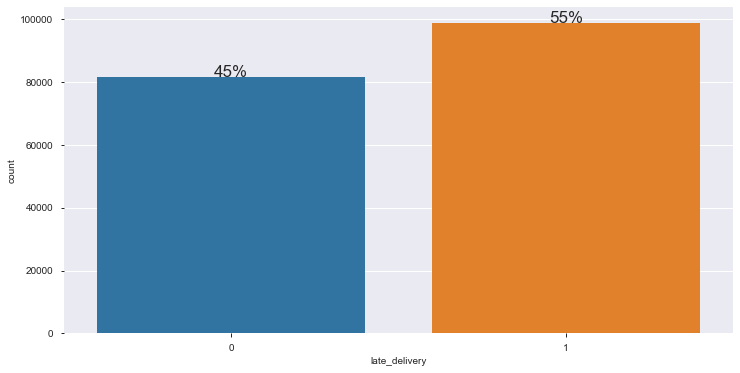

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('X_axis',fontsize=10);
ax.set_ylabel('Y_axis',fontsize=10);
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
total = float(len(df['late_delivery']))
ax= sns.countplot('late_delivery',data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 

#sns.countplot('late_delivery',data = df)

### <a id='7.1.2'>7.1.2 Order Item Quantity</a>
<a href='#0'>Go to top </a>

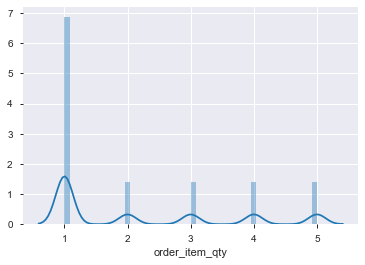

In [30]:

ax= sns.distplot(df['order_item_qty'])


### <a id='7.1.3'>7.1.3 Order Item Price</a>
<a href='#0'>Go to top </a>

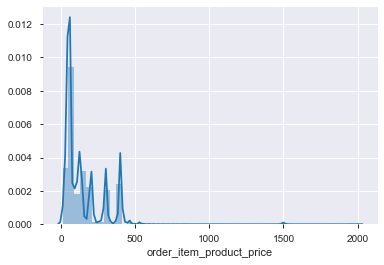

In [31]:

ax= sns.distplot(df['order_item_product_price'])


## <a id='7.2'>7.2 Bi-Variate Analysis (Order Level Attributes)</a> 
<a href='#0'>Go to top </a>

### <a id='7.2.1'>7.2.1 Shipping Days Scheduled</a>
<a href='#0'>Go to top </a>

In [32]:
#Insight
#For shipping days scheduled with values 0 and 4 have more on time deliveries than late deliveries

In [33]:
pd.DataFrame(
     df_orderlevel.groupby(['shipping_days_scheduled','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='shipping_days_scheduled',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})    
   

,shipping_days_scheduled,late_delivery_0,late_delivery_1
0,0,1923,1648
1,1,477,9602
2,2,2975,9803
3,4,24329,14995


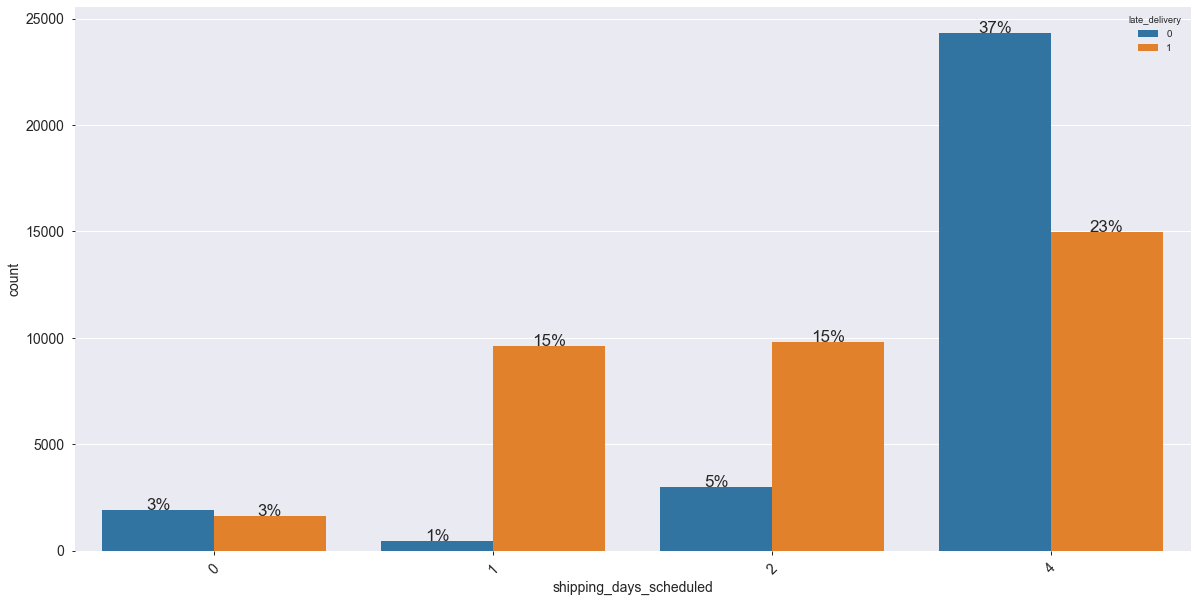

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel['order_status']))
ax= sns.countplot('shipping_days_scheduled',hue='late_delivery',data=df_orderlevel)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 

### <a id='7.2.2'>7.2.2 Order Status</a>
<a href='#0'>Go to top </a>

In [35]:
#Insight
#Look into int the shipping date of 'Suspected Fraud' and 'Canceled order status' 
# 'Order Status' with values 'Suspected Fraud' and 'Canceled order status' has no late delivery values.
# Rest of the order status have more number of late deliveries than on time deliveries

In [36]:
pd.DataFrame(
     df_orderlevel.groupby(['order_status','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='order_status',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})    
   

,order_status,late_delivery_0,late_delivery_1
0,CANCELED,1367.00,0.00
1,CLOSED,3137.00,4112.00
2,COMPLETE,9195.00,12521.00
3,ON_HOLD,1579.00,2045.00
4,PAYMENT_REVIEW,299.00,405.00
5,PENDING,3106.00,4215.00
6,PENDING_PAYMENT,6126.00,8256.00
7,PROCESSING,3407.00,4494.00
8,SUSPECTED_FRAUD,1488.00,0.00


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


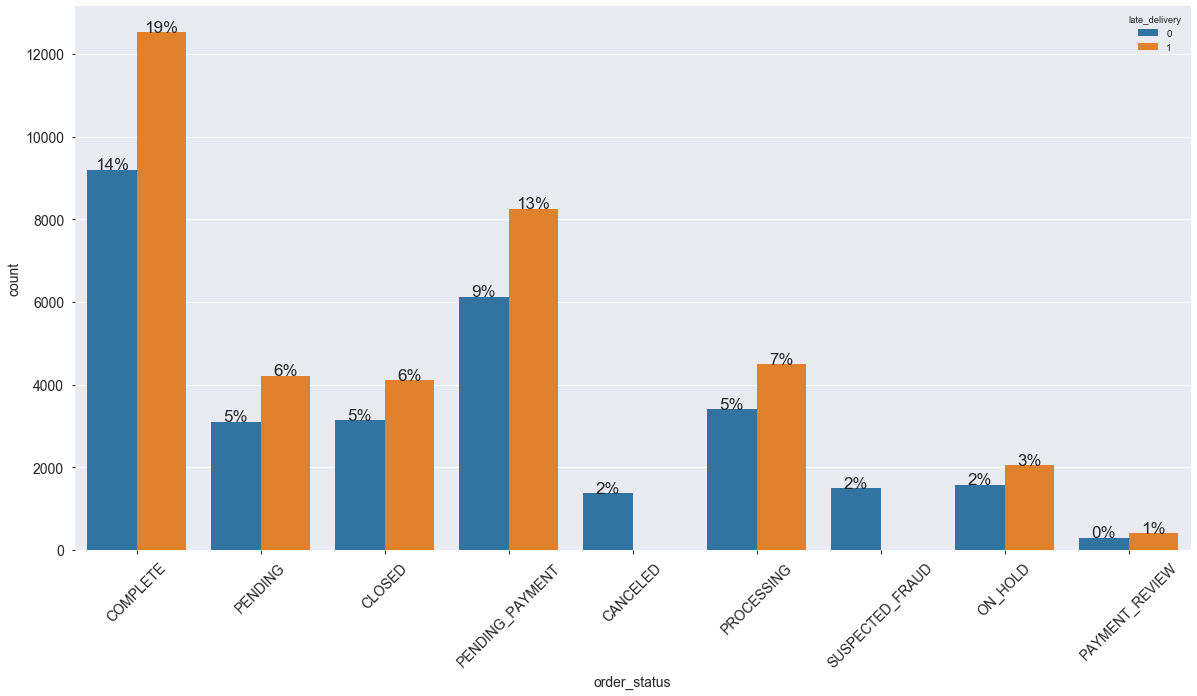

In [37]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel['order_status']))
ax= sns.countplot('order_status',hue='late_delivery',data=df_orderlevel)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 

### <a id='7.2.3'>7.2.3 Customer City</a>
<a href='#0'>Go to top </a>

In [38]:
pd.DataFrame(
     df_orderlevel.groupby(['customer_city','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='customer_city',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

,customer_city,late_delivery_0,late_delivery_1
66,Caguas,10998,13367
88,Chicago,595,792
59,Brooklyn,576,674
285,Los Angeles,558,690
348,New York,291,349
...,...,...,...
294,Malden,3,6
174,Freehold,3,2
491,Sumner,2,6
403,Ponce,2,5


#### Top 30 Customer citites

In [39]:
topcustcities_byorder = pd.DataFrame(
     df_orderlevel.groupby(['customer_city'])
                      .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt'],ascending=False)
)['customer_city'].head(30)

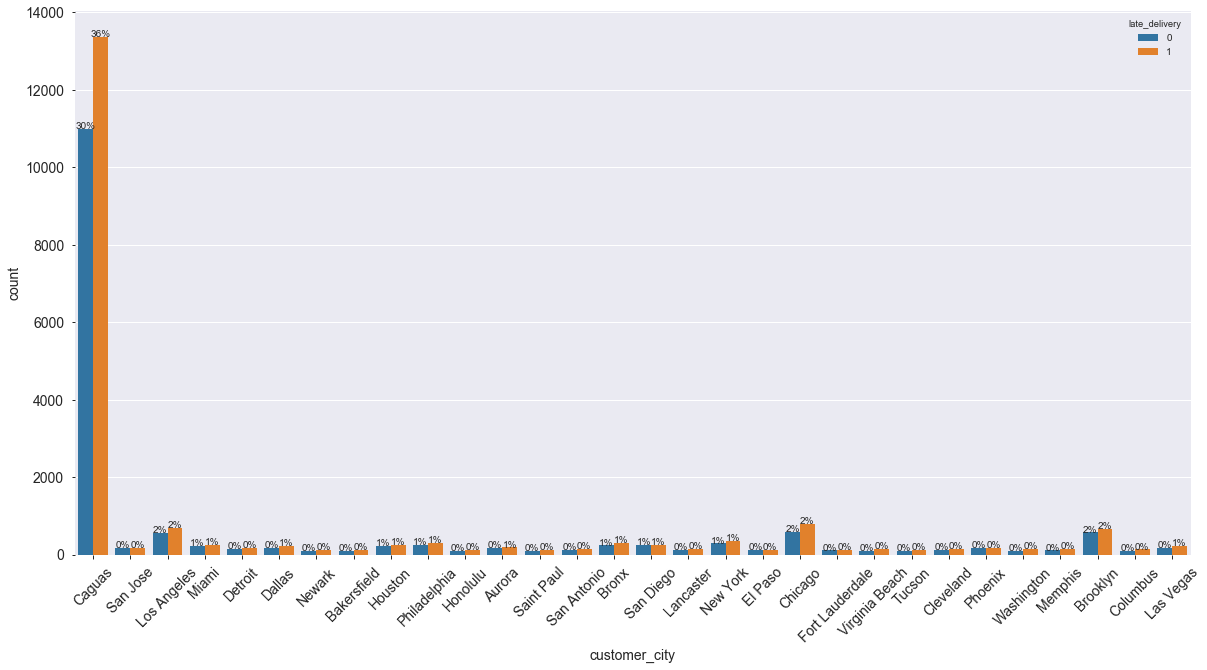

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel[df_orderlevel['customer_city'].isin(topcustcities_byorder)]['order_id']))
ax= sns.countplot('customer_city',hue='late_delivery',data=df_orderlevel[df_orderlevel['customer_city'].isin(topcustcities_byorder)])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=10,
            ha="center") 

#### Excluding Caguas City

In [41]:
topcustcities_byorder = pd.DataFrame(
     df_orderlevel.groupby(['customer_city'])
                      .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt'],ascending=False)
)['customer_city'].head(30).iloc[1:]

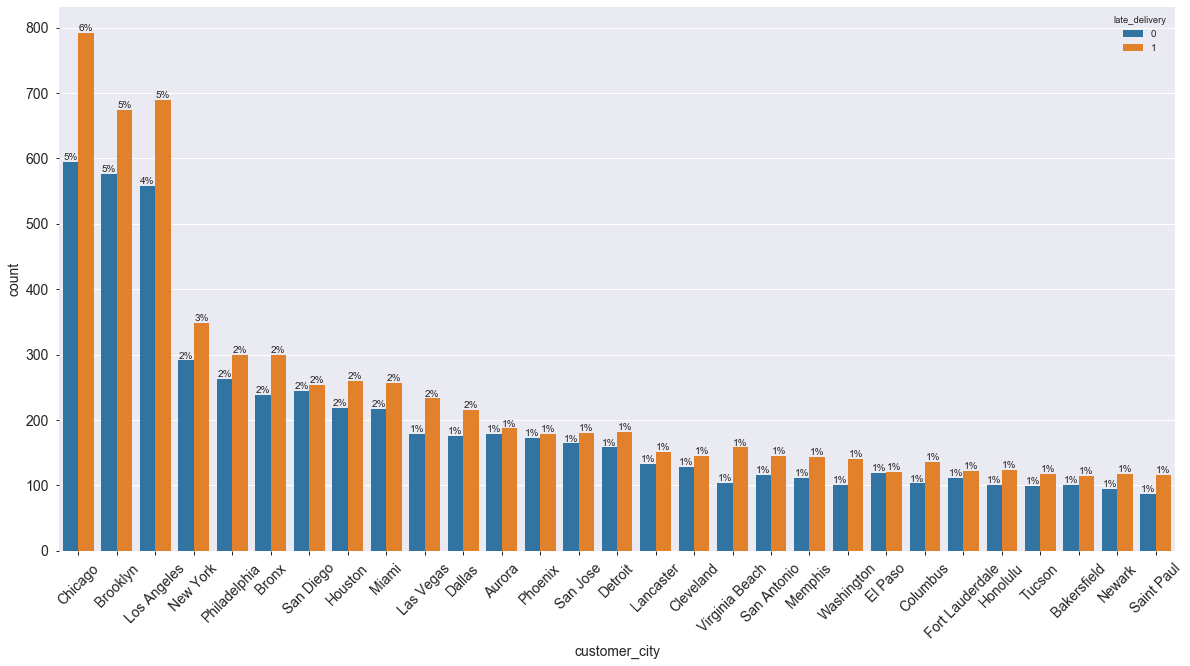

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel[df_orderlevel['customer_city'].isin(topcustcities_byorder)]['order_id']))
ax= sns.countplot('customer_city',hue='late_delivery',data=df_orderlevel[df_orderlevel['customer_city'].isin(topcustcities_byorder)]
                 ,order = df_orderlevel[df_orderlevel['customer_city'].isin(topcustcities_byorder)]['customer_city'].value_counts().index
                 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=10,
            ha="center") 

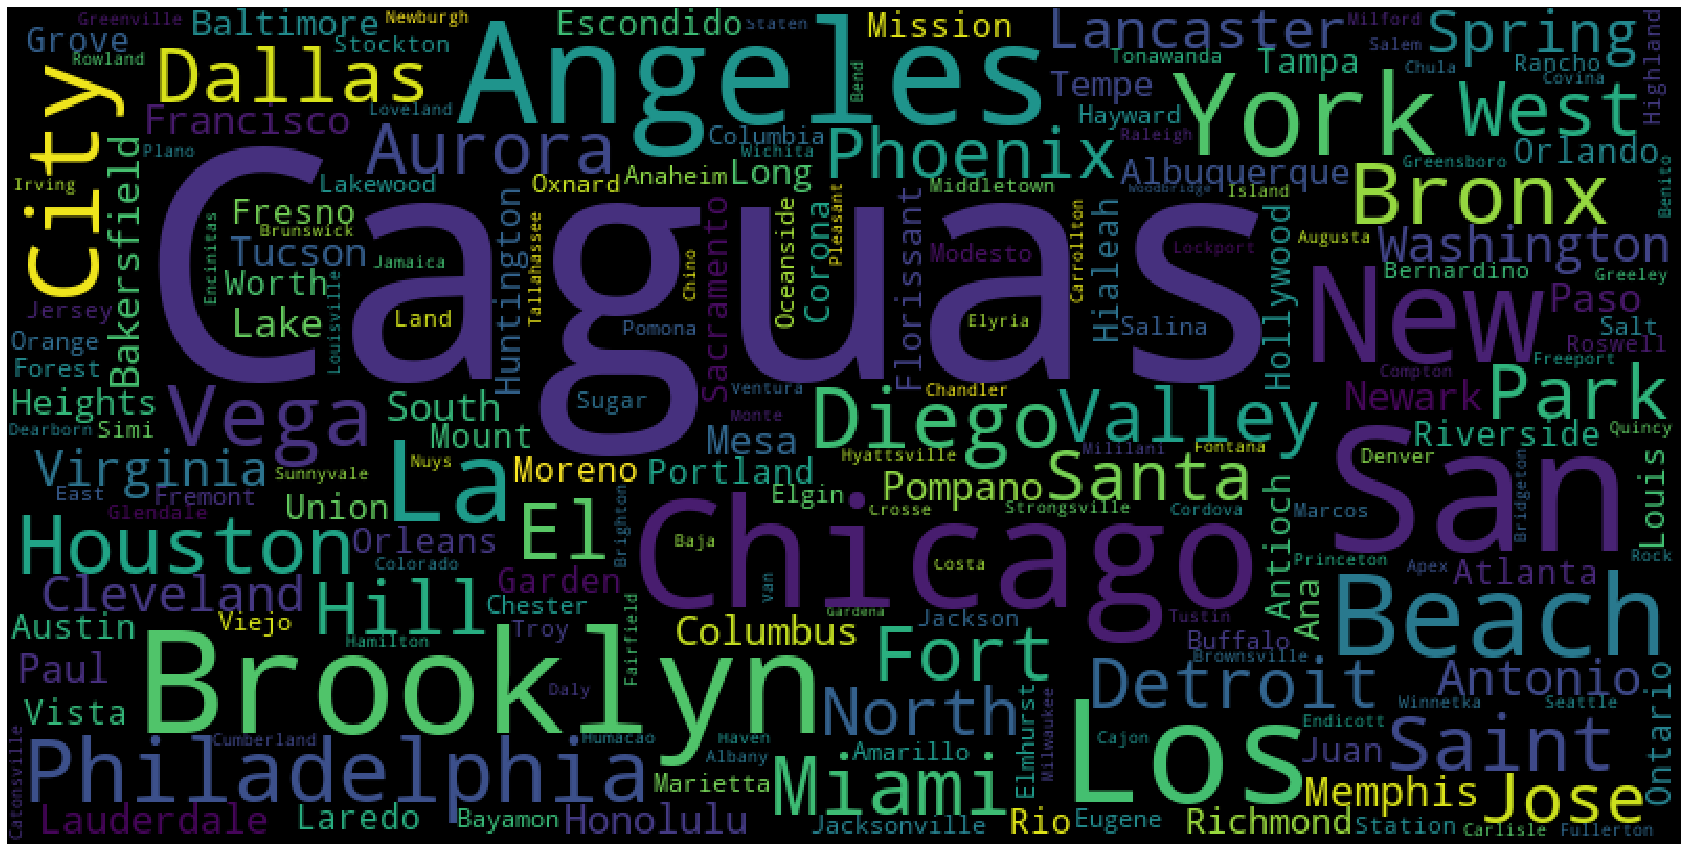

In [43]:
wordcloud = WordCloud(width=800, height=400, collocations=False).generate(' '.join(df_orderlevel.customer_city))

plt.figure(figsize=(30,20))

plt.imshow(wordcloud)

plt.axis("off")

plt.show()

### <a id='7.2.4'>7.2.4 Order City</a>
<a href='#0'>Go to top </a>

In [44]:
pd.DataFrame(
     df_orderlevel.groupby(['order_city','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='order_city',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

,order_city,late_delivery_0,late_delivery_1
2847,Santo Domingo,332.00,412.00
2237,New York City,326.00,416.00
1863,Los Angeles,304.00,324.00
1947,Manila,279.00,338.00
3111,Tegucigalpa,264.00,314.00
...,...,...,...
3531,Zaozhuang,0.00,1.00
3544,Zhlobin,0.00,1.00
3551,Zielona Gora,0.00,1.00
3560,Zwedru,0.00,1.00


#### Top 30 Order citites

In [45]:
pd.DataFrame(
     df_orderlevel.groupby(['order_city'])
                      .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt'],ascending=False)
).head(30)

,order_city,order_cnt
2847,Santo Domingo,744
2237,New York City,742
1863,Los Angeles,628
1947,Manila,617
3111,Tegucigalpa,578
1941,Managua,556
2059,Mexico City,502
3482,Yakarta,469
1848,London,458
2449,Philadelphia,439


In [46]:
topordercities_byorder = pd.DataFrame(
     df_orderlevel.groupby(['order_city'])
                      .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt'],ascending=False)
)['order_city'].head(30)

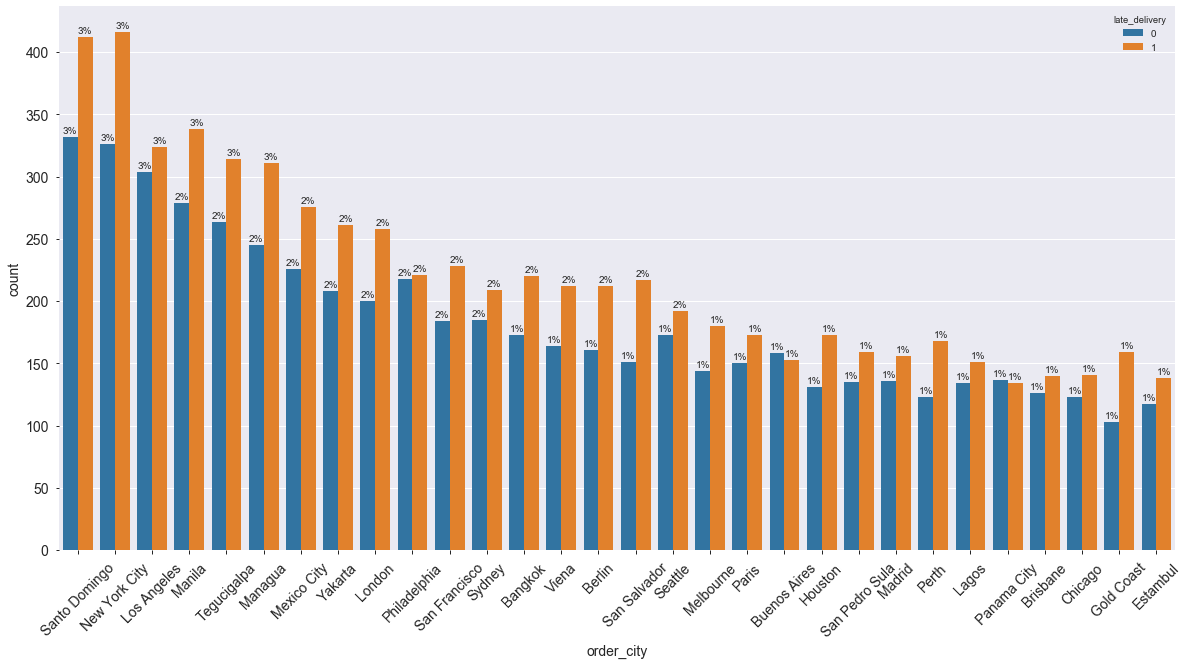

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel[df_orderlevel['order_city'].isin(topordercities_byorder)]['order_id']))
ax= sns.countplot('order_city',hue='late_delivery',data=df_orderlevel[df_orderlevel['order_city'].isin(topordercities_byorder)]
                 ,order= df_orderlevel[df_orderlevel['order_city'].isin(topordercities_byorder)]['order_city'].value_counts().index
                 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=10,
            ha="center") 

In [48]:


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

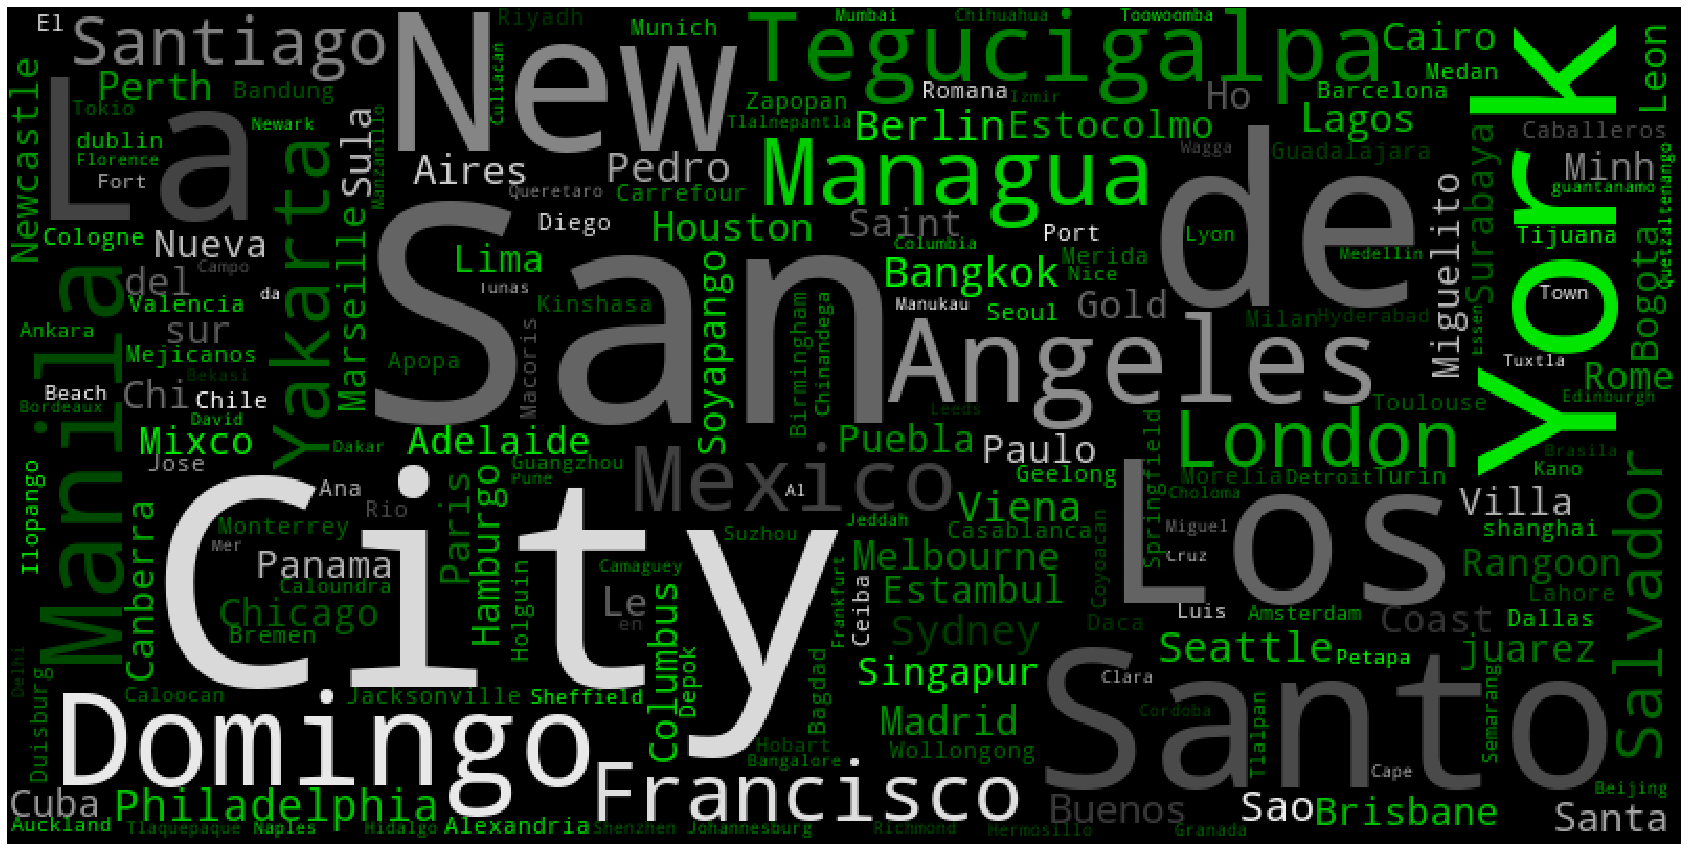

In [49]:
from wordcloud import (WordCloud, get_single_color_func)
wc = WordCloud(width=800, height=400, collocations=False).generate(' '.join(df_orderlevel.order_city))


color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': (df_orderlevel[df_orderlevel['late_delivery']==0]['order_city']).to_list(),
    # will be colored with a red single color function
    'red': (df_orderlevel[df_orderlevel['late_delivery']==1]['order_city']).to_list()
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)






plt.figure(figsize=(30,20))

plt.imshow(wc)

plt.axis("off")

plt.show()

### <a id='7.2.5'>7.2.5 Shipping Mode</a>
<a href='#0'>Go to top </a>

In [50]:
#Insight

# For shipping modes - 'Same day' and 'Standard class', there are more number of on time deliveries than the number of late deliveries  

In [51]:
pd.DataFrame(
     df_orderlevel.groupby(['shipping_mode','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='shipping_mode',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})    
   

,shipping_mode,late_delivery_0,late_delivery_1
0,First Class,477,9602
1,Same Day,1923,1648
2,Second Class,2975,9803
3,Standard Class,24329,14995


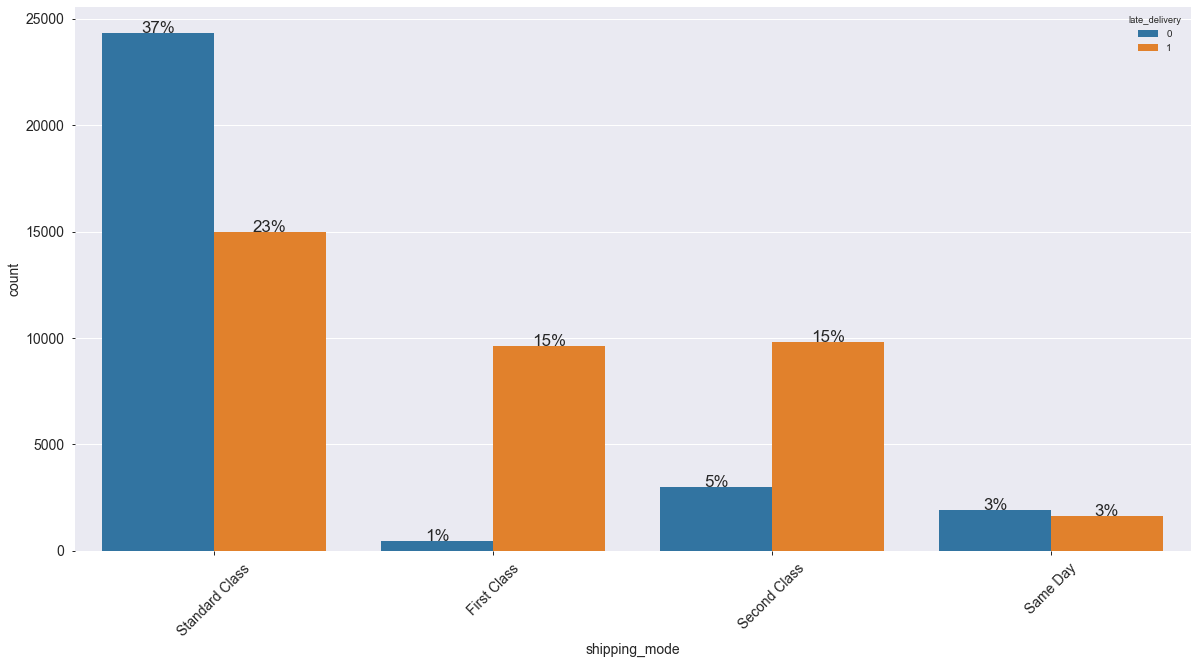

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel['order_region']))
ax= sns.countplot('shipping_mode',hue='late_delivery',data=df_orderlevel)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 

### <a id='7.2.6'>7.2.6 Type</a>
<a href='#0'>Go to top </a>

In [53]:
#Insight 

# "Transfer mode" is the only mode where there are more on time deliveries than late deliveries

In [54]:
pd.DataFrame(
     df_orderlevel.groupby(['type','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='type',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

,type,late_delivery_0,late_delivery_1
1,DEBIT,10774,14566
3,TRANSFER,9368,8709
2,PAYMENT,6425,8661
0,CASH,3137,4112


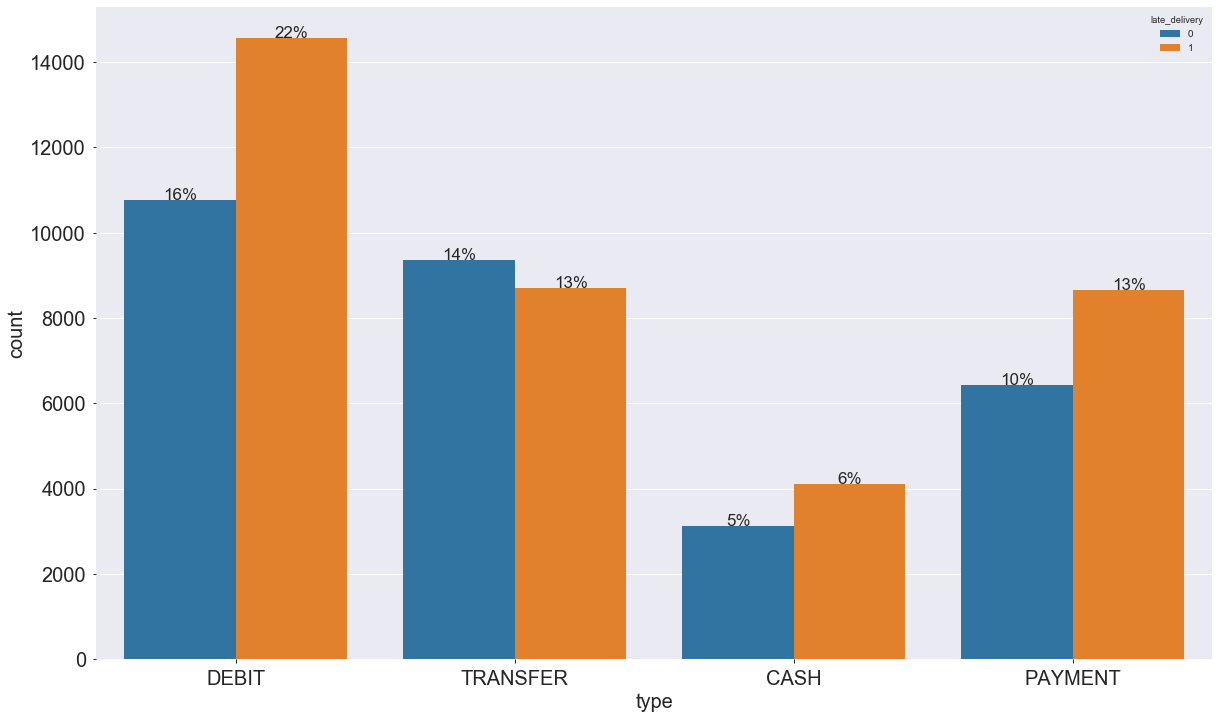

In [55]:
fig, ax = plt.subplots(figsize=(20,12))
ax.set_xlabel('X_axis',fontsize=20);
ax.set_ylabel('Y_axis',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
total = float(len(df_orderlevel['type']))
ax= sns.countplot('type',hue='late_delivery',data=df_orderlevel)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 


### <a id='7.2.7'>7.2.7 Market</a>
<a href='#0'>Go to top </a>

In [56]:
#Insight


In [57]:
pd.DataFrame(
     df_orderlevel.groupby(['market','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='market',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})    
   

,market,late_delivery_0,late_delivery_1
0,Africa,1768,2086
1,Europe,8362,10199
2,LATAM,7842,9339
3,Pacific Asia,7857,9720
4,USCA,3875,4704


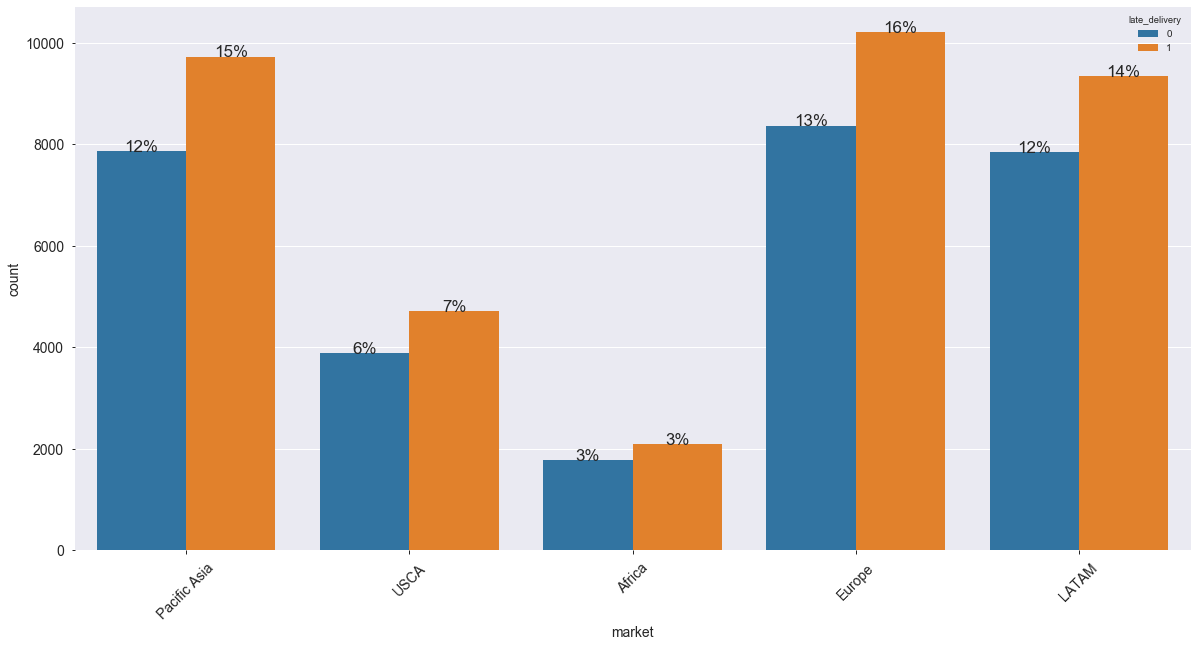

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel['market']))
ax= sns.countplot('market',hue='late_delivery',data=df_orderlevel)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 

In [59]:
#sns.countplot('customer_city',hue='late_delivery',data=df_orderlevel)

### <a id='7.2.8'>7.2.8 Customer Segment</a>
<a href='#0'>Go to top </a>

In [60]:
#Insight

# In all the customer segments, there are more number of late deliveries than on time deliveries

In [61]:
pd.DataFrame(
     df_orderlevel.groupby(['customer_segment','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='customer_segment',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

,customer_segment,late_delivery_0,late_delivery_1
0,Consumer,15447,18672
1,Corporate,8985,10871
2,Home Office,5272,6505


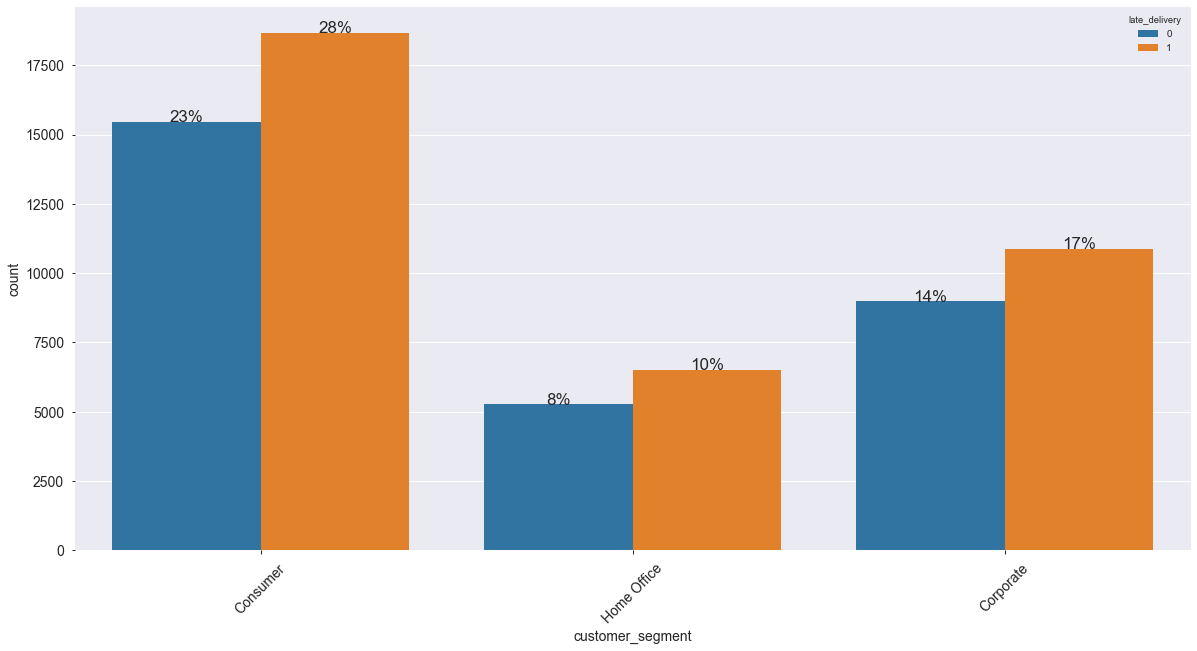

In [62]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel['order_region']))
ax= sns.countplot('customer_segment',hue='late_delivery',data=df_orderlevel)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 

### <a id='7.2.9'>7.2.9 Customer Country</a>
<a href='#0'>Go to top </a>

In [63]:
#Insight

# There are only two countries from which customers are placing orders. Both the countries have 
# more number of late deleveries than on time deliveries

In [64]:
pd.DataFrame(
     df_orderlevel.groupby(['customer_country','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='customer_country',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

,customer_country,late_delivery_0,late_delivery_1
0,EE. UU.,18269,22171
1,Puerto Rico,11435,13877


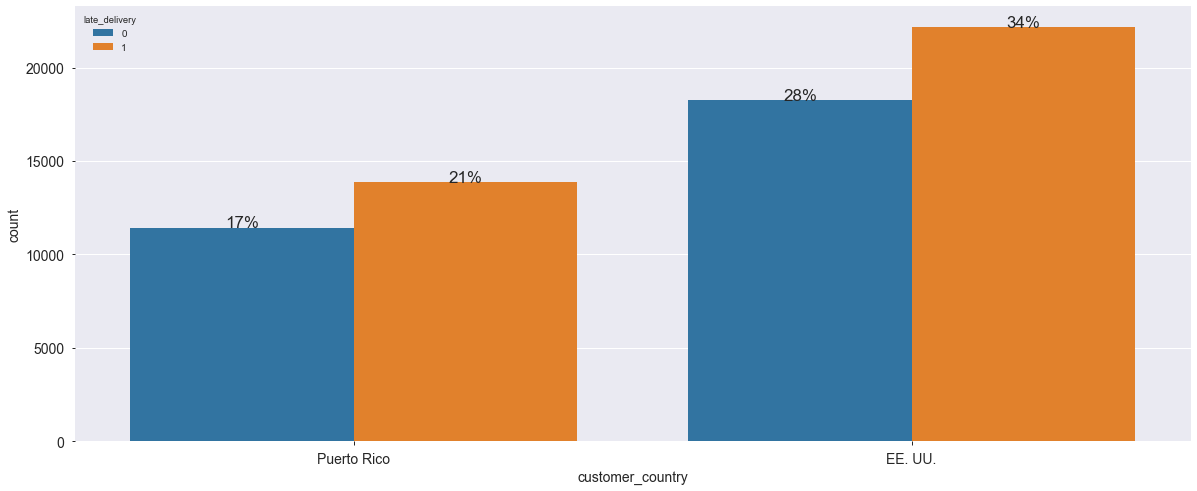

In [65]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel['customer_country']))
ax= sns.countplot('customer_country',hue='late_delivery',data=df_orderlevel)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 


#sns.countplot('customer_country',hue='late_delivery',data=df_orderlevel)

### <a id='7.2.10'>7.2.10 Order Region</a>
<a href='#0'>Go to top </a>

In [66]:
#Insight

# Canada is the only region where ontime deliveries and late deliveires are almost equal
# In Rest of the regions, there are more late delivieries than on time deliveries 

In [67]:
pd.DataFrame(
     df_orderlevel.groupby(['order_region','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='order_region',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

,order_region,late_delivery_0,late_delivery_1
22,Western Europe,4425,5585
3,Central America,4240,5156
12,South America,2283,2696
11,Oceania,1980,2382
15,Southeast Asia,1935,2421
10,Northern Europe,1720,1996
17,Southern Europe,1648,1895
7,Eastern Asia,1500,1818
13,South Asia,1470,1865
1,Caribbean,1319,1487


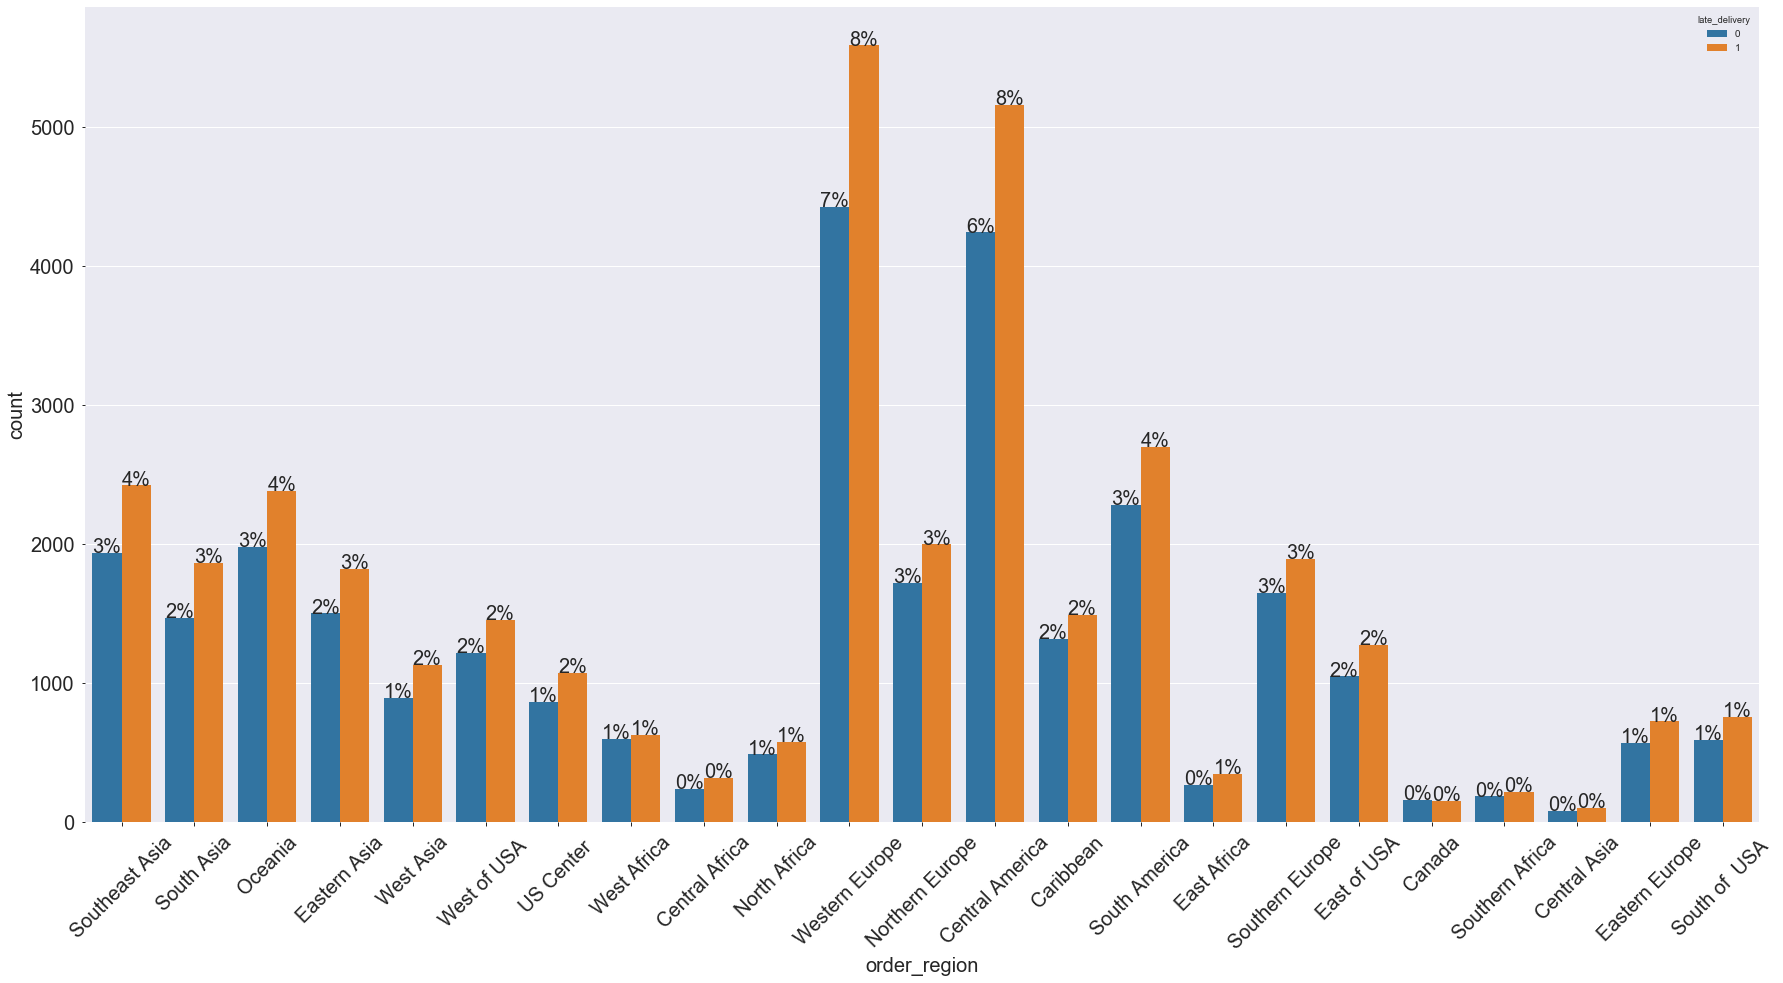

In [68]:
fig, ax = plt.subplots(figsize=(30,15))
ax.set_xlabel('X_axis',fontsize=20);
ax.set_ylabel('Y_axis',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
total = float(len(df_orderlevel['order_region']))
ax= sns.countplot('order_region',hue='late_delivery',data=df_orderlevel)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=20,
            ha="center") 


### <a id='7.2.11'>7.2.11 Order Date</a>
<a href='#0'>Go to top </a>

In [69]:
#Insight



In [70]:
temp = pd.DataFrame(
     df_orderlevel.groupby(['order_dt_year_month','late_delivery'])# 'order_dt_year','order_dt_month','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_dt_year_month'],ascending=True)
                  #.pivot(index=['order_dt_year','order_dt_month'],columns='late_delivery',values=['order_cnt'])
                  #.to_records()  
)#.fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})  

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

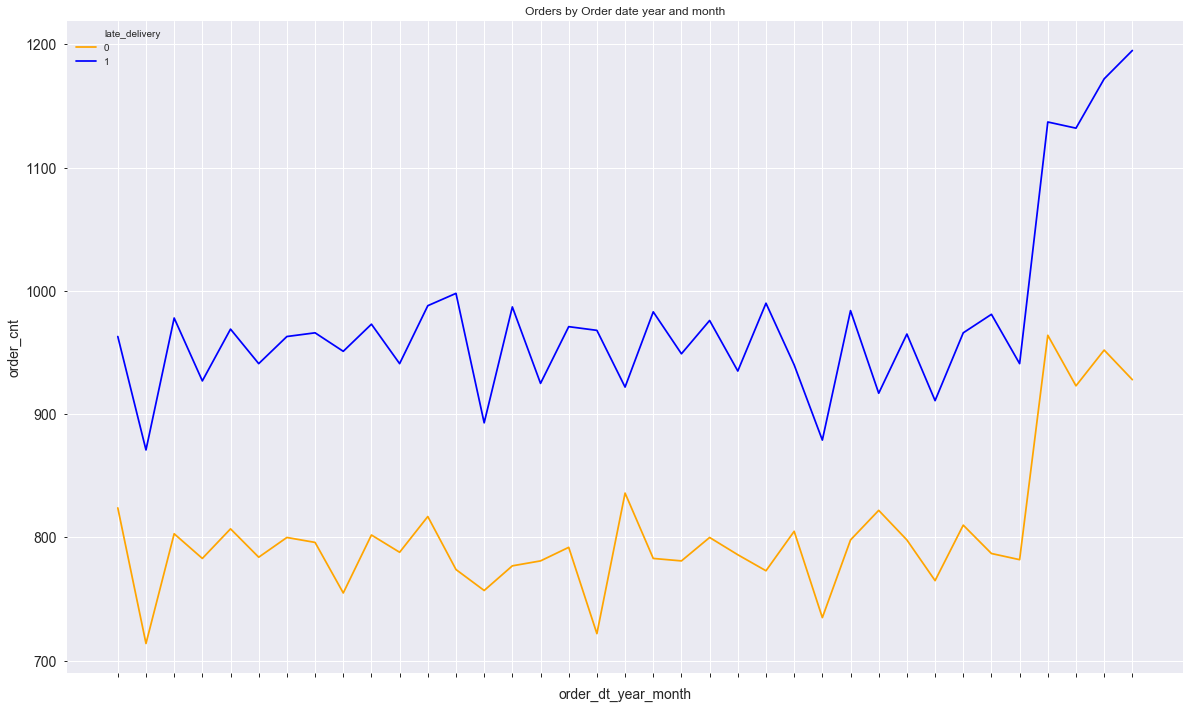

In [71]:
#temp['order_dt_year_month'] = df['order_dt_year'].map(str)+'-'+df['order_dt_month'].map(str)                 
fig,ax=plt.subplots(figsize = (20,12))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title('Orders by Order date year and month')
palette = ['orange','blue']
ax = sns.lineplot('order_dt_year_month','order_cnt',data =temp,hue='late_delivery',markers=True,dashes=False,palette=palette,sort=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,size=12)


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

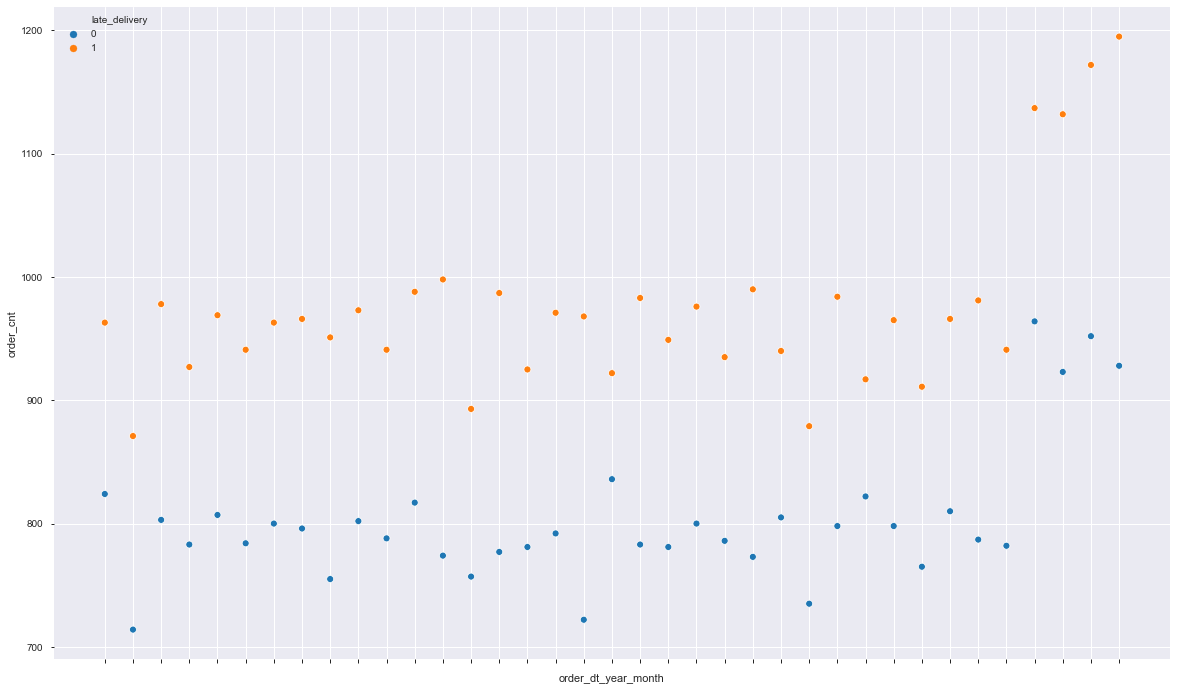

In [72]:
plt.figure(figsize = (20,12))
chart1 = sns.scatterplot('order_dt_year_month','order_cnt',data=temp,hue='late_delivery')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45,size=12)

### <a id='7.2.12'>7.2.12 Shipping Date</a>
<a href='#0'>Go to top </a>

In [73]:
#Insight


In [74]:
temp = pd.DataFrame(
     df_orderlevel.groupby(['shipping_dt_year_month','late_delivery'])# 'order_dt_year','order_dt_month','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['shipping_dt_year_month'],ascending=True)
                  #.pivot(index=['order_dt_year','order_dt_month'],columns='late_delivery',values=['order_cnt'])
                  #.to_records()  
)#.fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})  

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

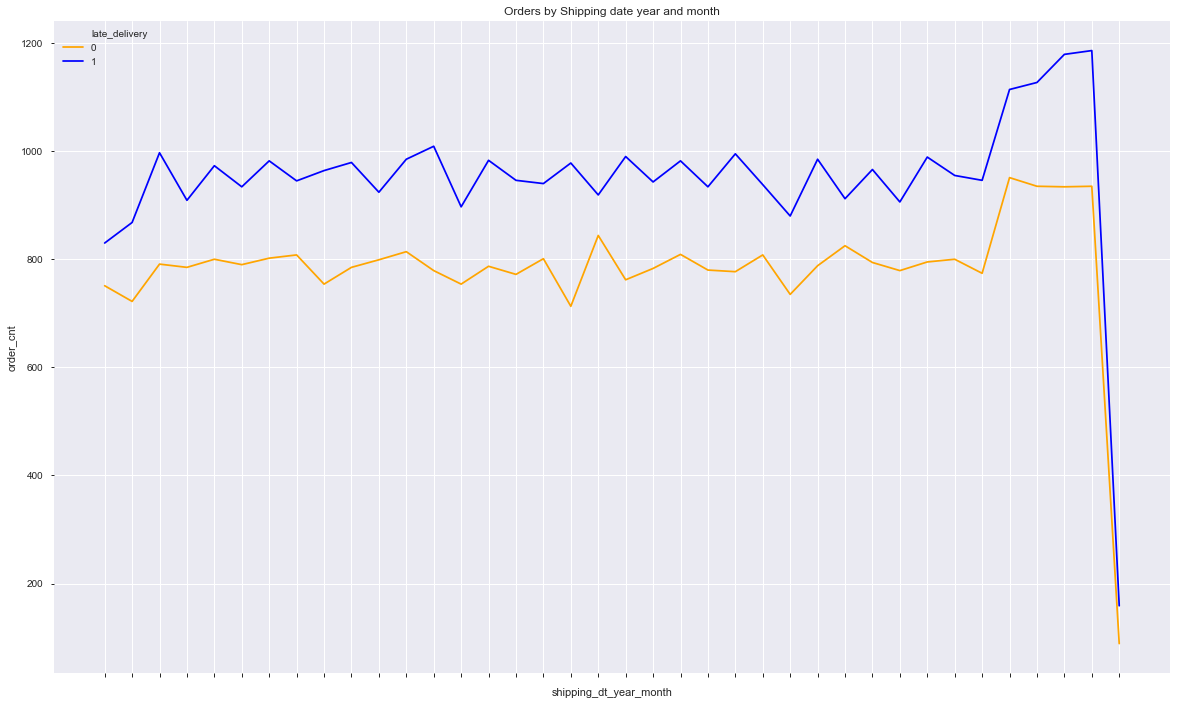

In [75]:
#temp['order_dt_year_month'] = df['order_dt_year'].map(str)+'-'+df['order_dt_month'].map(str)                 
fig,ax=plt.subplots(figsize = (20,12))
plt.title('Orders by Shipping date year and month')
palette = ['orange','blue']
ax = sns.lineplot('shipping_dt_year_month','order_cnt',data =temp,hue='late_delivery',markers=True,dashes=False,palette=palette,sort=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,size=12)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

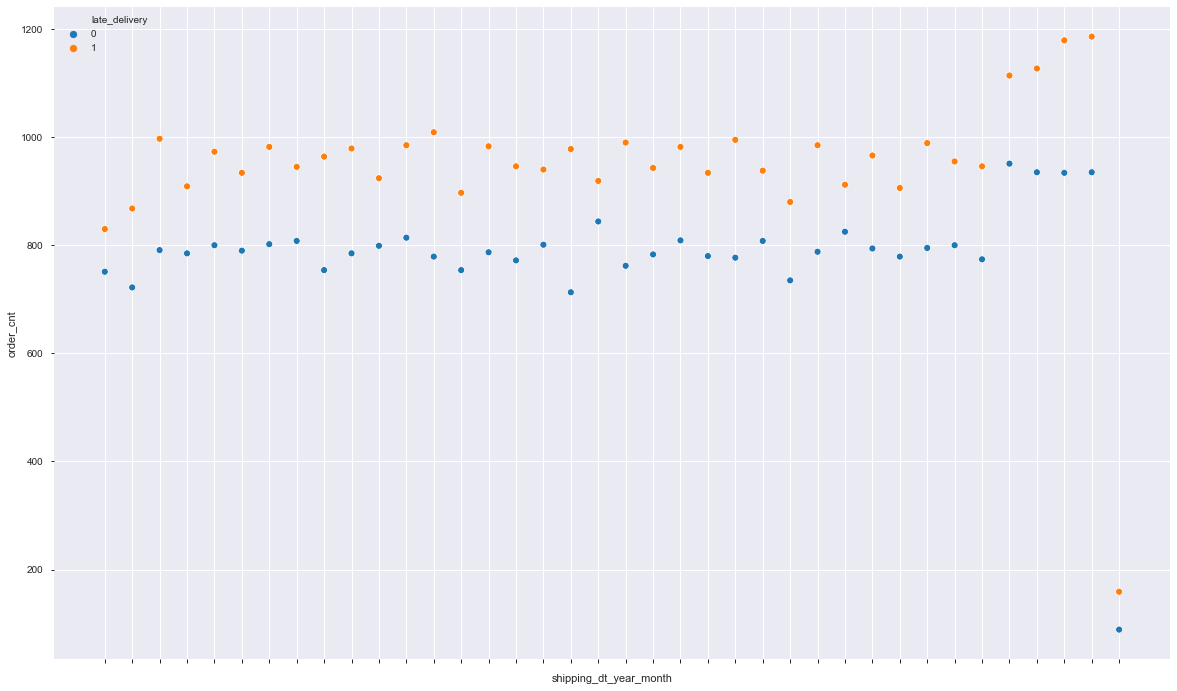

In [76]:
plt.figure(figsize = (20,12))
chart1 = sns.scatterplot('shipping_dt_year_month','order_cnt',data=temp,hue='late_delivery')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45,size=12)

### <a id='7.2.13'>7.2.13 Customer State</a>
<a href='#0'>Go to top </a>

In [77]:
#Insight

#Every customer state has more number of late deleveries than on time deliveries

In [78]:
pd.DataFrame(
     df_orderlevel.groupby(['customer_state','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='customer_state',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

,customer_state,late_delivery_0,late_delivery_1
36,PR,11435.00,13877.00
5,CA,4755.00,5843.00
31,NY,1885.00,2219.00
40,TX,1474.00,1844.00
15,IL,1191.00,1543.00
10,FL,904.00,1059.00
32,OH,682.00,802.00
35,PA,654.00,730.00
22,MI,635.00,741.00
28,NJ,557.00,634.00


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


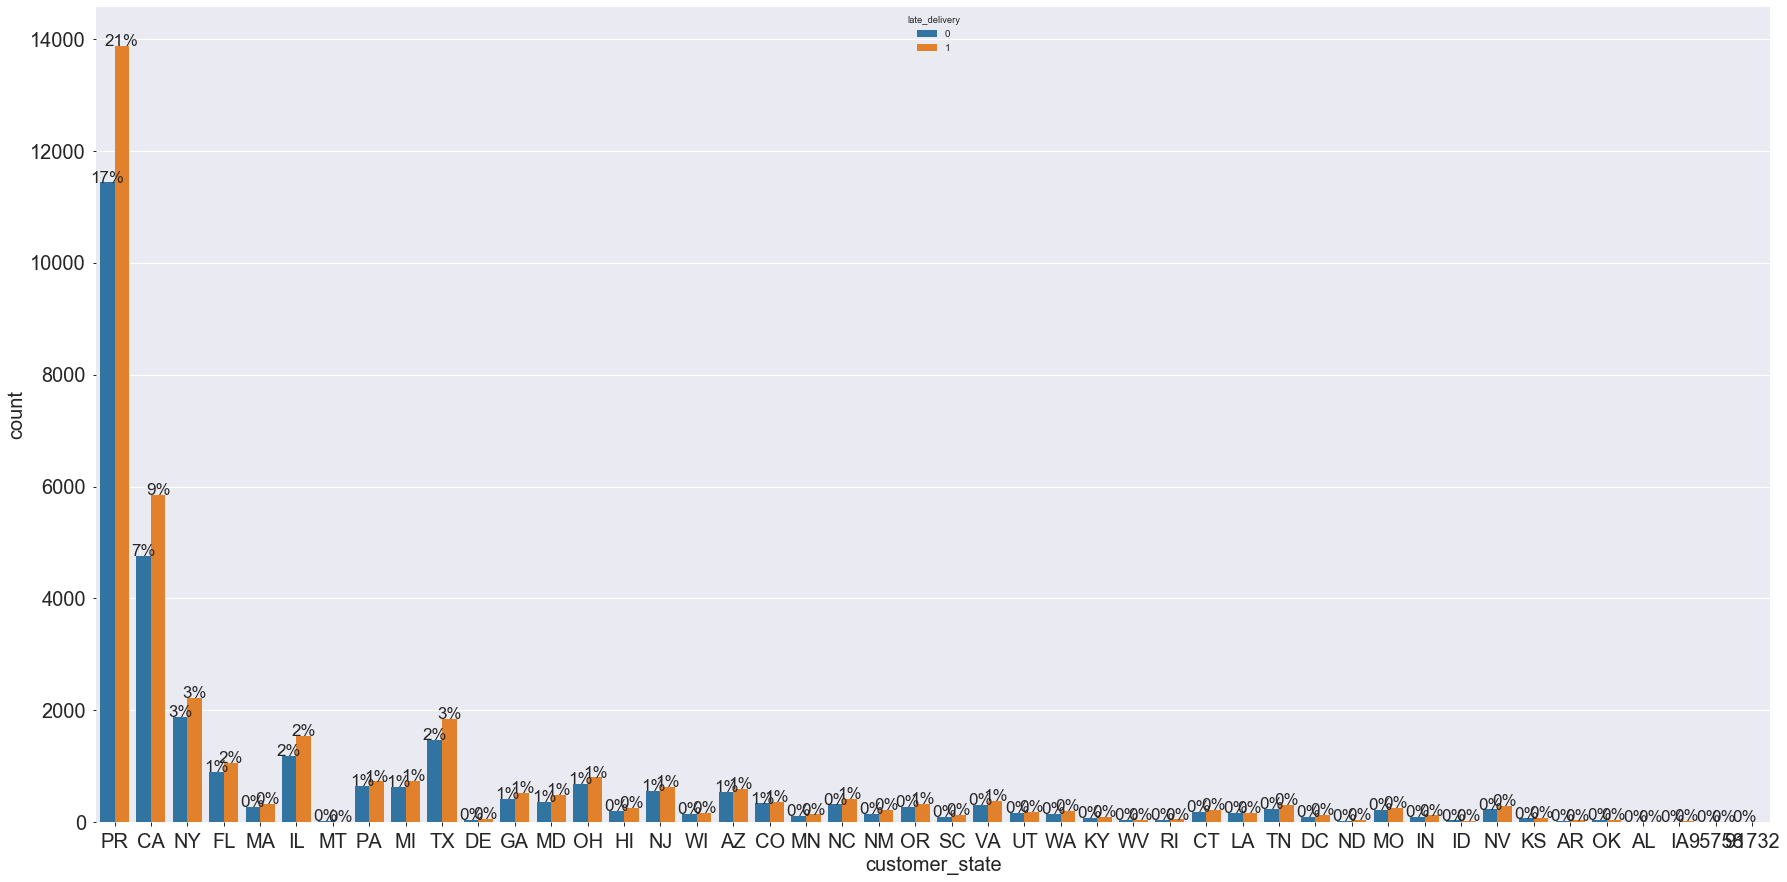

In [79]:
fig, ax = plt.subplots(figsize=(30,15))
ax.set_xlabel('X_axis',fontsize=20);
ax.set_ylabel('Y_axis',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
total = float(len(df_orderlevel['customer_state']))
ax= sns.countplot('customer_state',hue='late_delivery',data=df_orderlevel)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 

#plt.figure(figsize = (20,8))
#sns.countplot('customer_state',hue='late_delivery',data=df_orderlevel)

### <a id='7.2.14'>7.2.14 Order Country</a>
<a href='#0'>Go to top </a>

In [80]:
pd.DataFrame(
     df_orderlevel.groupby(['order_country','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='order_country',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

,order_country,late_delivery_0,late_delivery_1
153,United States,3719.00,4551.00
47,France,2151.00,2715.00
92,Mexico,1967.00,2428.00
6,Australia,1721.00,2077.00
50,Germany,1552.00,1966.00
...,...,...,...
136,Sudan del Sur,0.00,2.00
5,Armenia,0.00,1.00
42,Eritrea,0.00,1.00
117,RepÃÂÃÂºblica de Gambia,0.00,1.00


### <a id='7.2.15'>7.2.15 Order State</a>
<a href='#0'>Go to top </a>

In [81]:
pd.DataFrame(
     df_orderlevel.groupby(['order_state','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='order_state',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

,order_state,late_delivery_0,late_delivery_1
454,Inglaterra,1196.00,1370.00
188,California,767.00,886.00
462,Isla de Francia,740.00,952.00
846,Renania del Norte-Westfalia,547.00,682.00
739,Nueva Gales del Sur,490.00,548.00
...,...,...,...
995,Tlemcen,0.00,1.00
1002,Tottori,0.00,1.00
1045,Vrancea,0.00,1.00
1063,Yevrey,0.00,1.00


In [82]:
#plt.figure(figsize = (20,8))
#sns.countplot('order_state',hue='late_delivery',data=df_orderlevel)

In [83]:
#sns.countplot('order_country',hue='late_delivery',data=df_orderlevel)

In [84]:
df_orderlevel[df_orderlevel['order_status']=='CANCELED']

,order_id,late_delivery,customer_city,customer_country,customer_segment,customer_state,customer_street,type,shipping_days_actual,shipping_days_scheduled,delivery_status,late_delivery_risk,market,order_city,order_country,order_date,order_region,order_state,shipping_date,shipping_mode,order_status,store_city,store_state,gapbetween_orderandship_date,samecountry_source_dest,weekend_duringshipping,shipping_on_weekends,ordered_on_weekends,shipping_dt_weekday,order_dt_weekday,shipping_dt_weekday_name,order_dt_weekday_name,shipping_dt_year_month,order_dt_year_month,shipping_dt_month,order_dt_month,shipping_dt_year,order_dt_year,store_country,sc_oc,latitude,longitude
5,75935,0,Tonawanda,EE. UU.,Consumer,NY,2122 Hazy Corner,TRANSFER,6,4,Shipping canceled,0,Pacific Asia,Toowoomba,Australia,2018-01-13 11:03:00,Oceania,Queensland,2018-01-19 11:03:00,Standard Class,CANCELED,Tonawanda,New York,6.00,Different Countries,Yes Weekend involved,ShippededonWeekday,OrderedonWeekend,4,5,Friday,Saturday,2018-01,2018-01,1,1,2018,2018,United States,Tonawanda-Toowoomba,43.01,-78.88
23,75917,0,Caguas,Puerto Rico,Corporate,PR,1082 Quiet Treasure Link,TRANSFER,3,2,Shipping canceled,0,Pacific Asia,Geelong,Australia,2018-01-13 04:45:00,Oceania,Victoria,2018-01-16 04:45:00,Second Class,CANCELED,Caguas,Puerto Rico,3.00,Different Countries,No weekend involved,ShippededonWeekday,OrderedonWeekend,1,5,Tuesday,Saturday,2018-01,2018-01,1,1,2018,2018,Puerto Rico,Caguas-Geelong,18.21,-66.04
39,75901,0,Newark,EE. UU.,Consumer,DE,2556 Umber Autoroute,TRANSFER,1,0,Shipping canceled,0,Pacific Asia,Wollongong,Australia,2018-01-12 23:09:00,Oceania,Nueva Gales del Sur,2018-01-13 11:09:00,Same Day,CANCELED,New Castle County,Delaware,0.50,Different Countries,Yes Weekend involved,ShippedonWeekend,OrderedonWeekday,5,4,Saturday,Friday,2018-01,2018-01,1,1,2018,2018,United States,New Castle County-Wollongong,39.68,-75.64
199,42331,0,Rome,EE. UU.,Consumer,NY,2459 Round Spring Towers,TRANSFER,2,4,Shipping canceled,0,Africa,Antananarivo,Madagascar,2016-09-09 22:05:00,East Africa,Analamanga,2016-09-11 22:05:00,Standard Class,CANCELED,City of Rome,New York,2.00,Different Countries,Yes Weekend involved,ShippedonWeekend,OrderedonWeekday,6,4,Sunday,Friday,2016-09,2016-09,9,9,2016,2016,United States,City of Rome-Antananarivo,43.22,-75.46
200,41345,0,Vista,EE. UU.,Consumer,CA,690 Colonial Pine Passage,TRANSFER,6,4,Shipping canceled,0,Africa,Algiers,Algeria,2016-08-26 12:38:00,North Africa,Alger,2016-09-01 12:38:00,Standard Class,CANCELED,Vista,California,6.00,Different Countries,Yes Weekend involved,ShippededonWeekday,OrderedonWeekday,3,4,Thursday,Friday,2016-09,2016-08,9,8,2016,2016,United States,Vista-Algiers,33.21,-117.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172136,60092,0,Mechanicsburg,EE. UU.,Home Office,PA,8421 Sunny Butterfly Trace,TRANSFER,3,4,Shipping canceled,0,LATAM,Mejicanos,El Salvador,2017-05-27 04:33:00,Central America,San Salvador,2017-05-30 04:33:00,Standard Class,CANCELED,Mechanicsburg,Pennsylvania,3.00,Different Countries,No weekend involved,ShippededonWeekday,OrderedonWeekend,1,5,Tuesday,Saturday,2017-05,2017-05,5,5,2017,2017,United States,Mechanicsburg-Mejicanos,40.21,-77.01
177203,43139,0,Washington,EE. UU.,Corporate,DC,9050 Iron Apple Landing,TRANSFER,5,2,Shipping canceled,0,Pacific Asia,Beykoz,Turkey,2016-09-21 17:09:00,West Asia,Estambul,2016-09-26 17:09:00,Second Class,CANCELED,Westphalia,Maryland,5.00,Different Countries,No weekend involved,ShippededonWeekday,OrderedonWeekday,0,2,Monday,Wednesday,2016-09,2016-09,9,9,2016,2016,United States,Westphalia-Beykoz,38.86,-76.85
177650,11286,0,Cayey,Puerto Rico,Consumer,PR,2905 Umber Crest,TRANSFER,2,2,Shipping canceled,0,Europe,Paris,France,2015-06-14 17:38:00,Western Europe,Isla de Francia,2015-06-16 17:38:00,Second Class,CANCELED,Osborne County,Kansas,2.00,Different Countries,No weekend in

### <a id='7.2.16'>7.2.16 Store City - Order City</a>
<a href='#0'>Go to top </a>

In [85]:
#df_orderlevel['sc_oc'] = df_orderlevel['store_city']+"-"+df_orderlevel['order_city']

In [86]:
pd.DataFrame(
     df_orderlevel.groupby(['sc_oc','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='sc_oc',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}
)#.sort_values(['late_delivery_0','late_delivery_1'],ascending=False).head(50)

,sc_oc,late_delivery_0,late_delivery_1
0,Adam Stephen Homes-Ahvaz,1.00,0.00
1,Adam Stephen Homes-Annaba,1.00,0.00
2,Adam Stephen Homes-Ballarat,0.00,1.00
3,Adam Stephen Homes-Budapest,0.00,1.00
4,Adam Stephen Homes-Cairo,1.00,0.00
...,...,...,...
42545,ÃÂ¥ÃÂ²ÃÂ³ÃÂ¦ÃÂÃÂ®ÃÂ¦ÃÂ¹ÃÂÃÂ¥ÃÂÃ...,0.00,1.00
42546,ÃÂ¨ÃÂ¾ÃÂ¹ÃÂ¤ÃÂ¸ÃÂ­ÃÂ¦ÃÂÃÂ-Blackpool,1.00,0.00
42547,ÃÂ¨ÃÂ¾ÃÂ¹ÃÂ¤ÃÂ¸ÃÂ­ÃÂ¦ÃÂÃÂ-Newcastle,1.00,0.00
42548,ÃÂ¨ÃÂ¾ÃÂ¹ÃÂ¤ÃÂ¸ÃÂ­ÃÂ¦ÃÂÃÂ-Tamworth,0.00,1.00


### <a id='7.2.17'>7.2.17 Is Source and Dest Country same?</a>
<a href='#0'>Go to top </a>

In [87]:
pd.DataFrame(
     df_orderlevel.groupby(['samecountry_source_dest','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='samecountry_source_dest',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})    
   

,samecountry_source_dest,late_delivery_0,late_delivery_1
0,Different Countries,26751,32469
1,Same Country,2953,3579


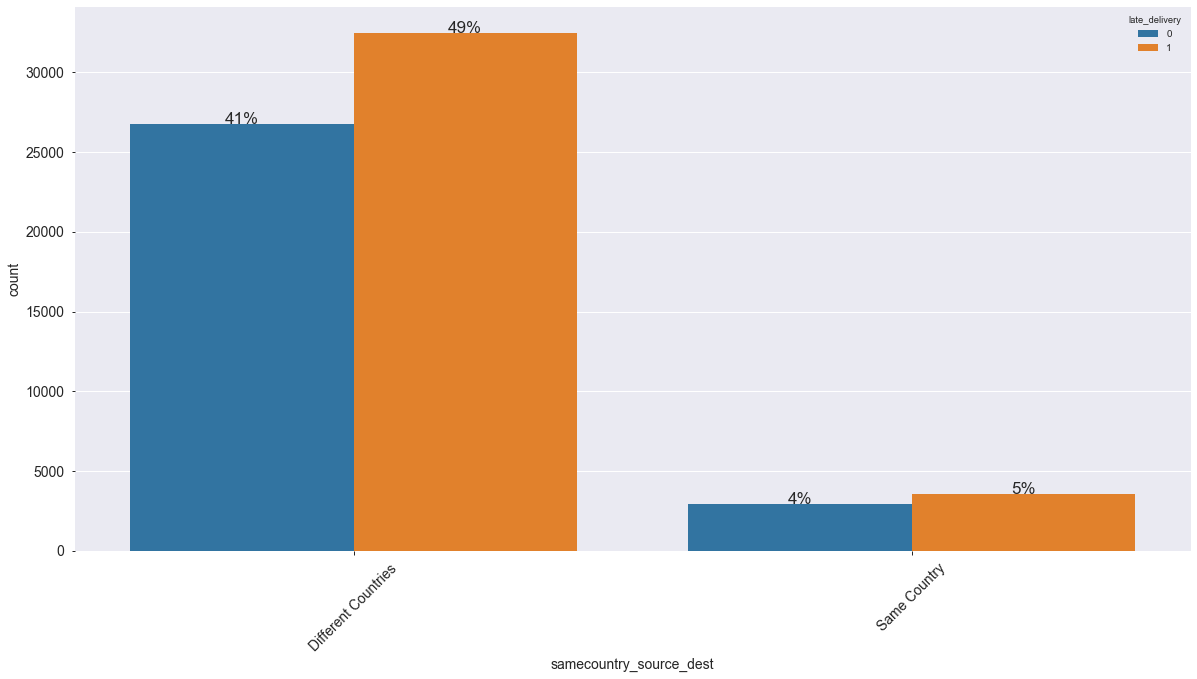

In [88]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('X_axis',fontsize=14);
ax.set_ylabel('Y_axis',fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
total = float(len(df_orderlevel['order_status']))
ax= sns.countplot('samecountry_source_dest',hue='late_delivery',data=df_orderlevel)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),fontsize=17,
            ha="center") 

### <a id='7.2.18'>7.2.18 Order Date Week Day</a>
<a href='#0'>Go to top </a>

In [89]:
temp_OrderDateWeekDay =  pd.DataFrame(
     df_orderlevel.groupby(['order_dt_weekday','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='order_dt_weekday',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})    
   

In [90]:
temp_OrderDateWeekDay['percent_ontimedelivery'] = temp_OrderDateWeekDay['late_delivery_0']/(temp_OrderDateWeekDay['late_delivery_0']+temp_OrderDateWeekDay['late_delivery_1'])

temp_OrderDateWeekDay['percent_latedelivery'] = temp_OrderDateWeekDay['late_delivery_1']/(temp_OrderDateWeekDay['late_delivery_0']+temp_OrderDateWeekDay['late_delivery_1'])

In [91]:
temp_OrderDateWeekDay

,order_dt_weekday,late_delivery_0,late_delivery_1,percent_ontimedelivery,percent_latedelivery
0,0,4231,5137,0.45,0.55
1,1,4272,5123,0.45,0.55
2,2,4240,5157,0.45,0.55
3,3,4209,5186,0.45,0.55
4,4,4247,5153,0.45,0.55
5,5,4287,5143,0.45,0.55
6,6,4218,5149,0.45,0.55


### <a id='7.2.19'>7.2.19 Shipping Date Week Day</a>
<a href='#0'>Go to top </a>

In [92]:
temp_ShipDateWeekDay = pd.DataFrame(
     df_orderlevel.groupby(['shipping_dt_weekday','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='shipping_dt_weekday',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})    
   

temp_ShipDateWeekDay['percent_ontimedelivery'] = temp_ShipDateWeekDay['late_delivery_0']/(temp_ShipDateWeekDay['late_delivery_0']+temp_OrderDateWeekDay['late_delivery_1'])

temp_ShipDateWeekDay['percent_latedelivery'] = temp_ShipDateWeekDay['late_delivery_1']/(temp_ShipDateWeekDay['late_delivery_0']+temp_ShipDateWeekDay['late_delivery_1'])

In [93]:
temp_ShipDateWeekDay

,shipping_dt_weekday,late_delivery_0,late_delivery_1,percent_ontimedelivery,percent_latedelivery
0,0,4239,5195,0.45,0.55
1,1,4220,5173,0.45,0.55
2,2,4256,5098,0.45,0.55
3,3,4241,5136,0.45,0.55
4,4,4222,5111,0.45,0.55
5,5,4281,5197,0.45,0.55
6,6,4245,5138,0.45,0.55


### <a id='7.2.20'>7.2.20 Order Date Month</a>
<a href='#0'>Go to top </a>

In [94]:
df_orderlevel[['order_dt_month']]

,order_dt_month
0,1
1,1
2,1
3,1
4,1
...,...
180312,1
180410,1
180430,1
180447,1


In [95]:
temp_orderDateMonth = pd.DataFrame(
     df_orderlevel.groupby(['order_dt_month','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='order_dt_month',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})    
   

In [96]:
temp_orderDateMonth['percent_ontimedelivery'] = temp_orderDateMonth['late_delivery_0']/(temp_orderDateMonth['late_delivery_0']+temp_orderDateMonth['late_delivery_1'])

temp_orderDateMonth['percent_latedelivery'] = temp_orderDateMonth['late_delivery_1']/(temp_orderDateMonth['late_delivery_0']+temp_orderDateMonth['late_delivery_1'])

In [97]:
temp_orderDateMonth

,order_dt_month,late_delivery_0,late_delivery_1,percent_ontimedelivery,percent_latedelivery
0,1,3331,4096,0.45,0.55
1,2,2206,2643,0.45,0.55
2,3,2378,2949,0.45,0.55
3,4,2386,2769,0.46,0.54
4,5,2397,2905,0.45,0.55
5,6,2271,2820,0.45,0.55
6,7,2446,2851,0.46,0.54
7,8,2366,2930,0.45,0.55
8,9,2318,2841,0.45,0.55
9,10,2566,3086,0.45,0.55


### <a id='7.2.21'>7.2.21 Shipping Days Scheduled Mean and Gap between Order date and Ship date Mean </a>
<a href='#0'>Go to top </a>

In [111]:
grouped_multiple = df_orderlevel.groupby(['order_dt_month','order_country','late_delivery']).agg({'order_id':'count','shipping_days_scheduled':[np.mean,np.sum],'gapbetween_orderandship_date':np.mean})
grouped_multiple.columns = ['order_cnt', 'shipping_days_scheduled_mean', 'shipping_days_scheduled_sum','gapbetween_orderandship_date_mean']
grouped_multiple = grouped_multiple.reset_index().sort_values(['order_cnt'],ascending=False)

In [112]:
grouped_multiple.head(20)

,order_dt_month,order_country,late_delivery,order_cnt,shipping_days_scheduled_mean,shipping_days_scheduled_sum,gapbetween_orderandship_date_mean
488,5,United States,1,971,2.47,2401,4.07
558,6,United States,1,968,2.48,2399,4.09
594,7,United States,1,922,2.48,2288,4.07
427,4,United States,1,896,2.47,2214,4.07
593,7,United States,0,836,3.42,2862,2.79
695,8,United States,1,794,2.44,1941,4.01
487,5,United States,0,792,3.42,2711,2.79
426,4,United States,0,760,3.54,2690,2.84
557,6,United States,0,722,3.51,2533,2.85
694,8,United States,0,609,3.51,2139,2.82


In [113]:
grouped_multiple[grouped_multiple['order_country']=='India']

,order_dt_month,order_country,late_delivery,order_cnt,shipping_days_scheduled_mean,shipping_days_scheduled_sum,gapbetween_orderandship_date_mean
75,1,India,1,381,2.42,923,4.03
1319,12,India,1,334,2.34,781,4.07
74,1,India,0,295,3.58,1056,2.85
1318,12,India,0,250,3.37,842,2.72
1126,11,India,1,240,2.36,566,3.94
1125,11,India,0,189,3.59,678,2.87
236,2,India,1,146,2.55,372,4.12
235,2,India,0,138,3.50,483,2.76
330,3,India,1,81,2.36,191,4.12
329,3,India,0,49,3.55,174,2.64


In [114]:
grouped_multiple[grouped_multiple['order_country']=='Sri Lanka']

,order_dt_month,order_country,late_delivery,order_cnt,shipping_days_scheduled_mean,shipping_days_scheduled_sum,gapbetween_orderandship_date_mean
1402,12,Sri Lanka,1,3,3.00,9,4.33
1221,11,Sri Lanka,1,3,3.00,9,4.67
1401,12,Sri Lanka,0,1,4.00,4,4.00
270,2,Sri Lanka,0,1,4.00,4,4.00
160,1,Sri Lanka,1,1,4.00,4,5.00
271,2,Sri Lanka,1,1,4.00,4,5.00
1220,11,Sri Lanka,0,1,4.00,4,4.00


### <a id='7.2.22'>7.2.22 Is there a weekend between Order date and Ship Date? </a>
<a href='#0'>Go to top </a>

In [103]:
pd.DataFrame(
     df_orderlevel.groupby(['ordered_on_weekends','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='ordered_on_weekends',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})  

,ordered_on_weekends,late_delivery_0,late_delivery_1
0,OrderedonWeekday,21199,25756
1,OrderedonWeekend,8505,10292


In [104]:
pd.DataFrame(
     df_orderlevel.groupby(['shipping_on_weekends','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='shipping_on_weekends',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}) 

,shipping_on_weekends,late_delivery_0,late_delivery_1
0,ShippededonWeekday,21178,25713
1,ShippedonWeekend,8526,10335


In [105]:
pd.DataFrame(
     df_orderlevel.groupby(['weekend_duringshipping','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='weekend_duringshipping',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'})  

,weekend_duringshipping,late_delivery_0,late_delivery_1
0,No weekend involved,13395,9867
1,Yes Weekend involved,16309,26181


In [108]:
df_orderlevel.groupby(['shipping_mode','weekend_duringshipping'])['shipping_days_actual'].mean()

shipping_mode   weekend_duringshipping
First Class     No weekend involved      2.00
                Yes Weekend involved     2.00
Same Day        No weekend involved      0.48
                Yes Weekend involved     0.50
Second Class    No weekend involved      3.01
                Yes Weekend involved     4.40
Standard Class  No weekend involved      3.00
                Yes Weekend involved     4.40
Name: shipping_days_actual, dtype: float64

In [109]:
df_orderlevel.groupby(['shipping_mode','weekend_duringshipping'])['shipping_days_actual'].unique()

shipping_mode   weekend_duringshipping
First Class     No weekend involved                   [2]
                Yes Weekend involved                  [2]
Same Day        No weekend involved                [0, 1]
                Yes Weekend involved               [0, 1]
Second Class    No weekend involved          [3, 2, 5, 4]
                Yes Weekend involved      [6, 5, 4, 3, 2]
Standard Class  No weekend involved          [3, 2, 4, 5]
                Yes Weekend involved      [3, 5, 4, 6, 2]
Name: shipping_days_actual, dtype: object

In [110]:
df_orderlevel.groupby(['shipping_mode','weekend_duringshipping'])['shipping_days_actual'].value_counts()

shipping_mode   weekend_duringshipping  shipping_days_actual
First Class     No weekend involved     2                       5804
                Yes Weekend involved    2                       4275
Same Day        No weekend involved     0                       1322
                                        1                       1200
                Yes Weekend involved    1                        527
                                        0                        522
Second Class    No weekend involved     2                       1456
                                        3                       1088
                                        4                        757
                                        5                        376
                Yes Weekend involved    6                       2564
                                        5                       2177
                                        4                       1808
                                        3 

## <a id='7.3'>7.3 Bi-Variate Analysis (Order Item Level Attributes)</a> 
<a href='#0'>Go to top </a>

### <a id='7.3.1'>7.3.1 Product Analysis at Order item Level</a> 
<a href='#0'>Go to top </a>

In [115]:
temp = pd.DataFrame(
     df.groupby(['product_name','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='product_name',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

In [116]:
temp['late_delivery_percentage'] = (temp['late_delivery_1']/(temp['late_delivery_1']+temp['late_delivery_0']))

In [117]:
temp.sort_values('late_delivery_percentage')

,product_name,late_delivery_0,late_delivery_1,late_delivery_percentage
77,SOLE E35 Elliptical,9,6,0.40
85,TaylorMade Women's RBZ SL Rescue,39,29,0.43
20,Diamondback Girls' Clarity 24 Hybrid Bike 201,16,12,0.43
51,Merrell Women's Grassbow Sport Waterproof Hik,33,25,0.43
52,Merrell Women's Siren Mid Waterproof Hiking B,37,33,0.47
...,...,...,...,...
98,Titleist Small Wheeled Travel Cover,20,34,0.63
100,Total Gym 1400,13,23,0.64
36,GoPro HERO3+ Black Edition Camera,11,21,0.66
68,Ogio Race Golf Shoes,19,42,0.69


In [118]:
delayed_topprods = temp.sort_values('late_delivery_percentage',ascending=False).head(9)['product_name'].to_list()

### <a id='7.3.2'>7.3.2 Aggregating Delayed Top Products to Order Level </a> 
<a href='#0'>Go to top </a>

In [119]:
delayed_topprods

['SOLE E25 Elliptical',
 'Ogio Race Golf Shoes',
 'GoPro HERO3+ Black Edition Camera',
 'Total Gym 1400',
 'Titleist Small Wheeled Travel Cover',
 'Team Golf St. Louis Cardinals Putter Grip',
 'Pelican Maverick 100X Kayak',
 "Diamondback Boys' Insight 24 Performance Hybr",
 'Titleist Club Glove Travel Cover']

In [120]:
df['delayed_topprods'] = np.where(df['product_name'].isin(delayed_topprods),df['product_name'],'other_prods')

In [121]:
df['value'] =1

In [122]:
df_prods= pd.DataFrame( df.groupby(['order_id','delayed_topprods'])
                          .agg({'value':sum})
                          .reset_index()
                          .pivot(index='order_id',columns='delayed_topprods',values='value')
                          .to_records()
                        ).fillna(0)


In [123]:
df_prods.head()

,order_id,Diamondback Boys' Insight 24 Performance Hybr,GoPro HERO3+ Black Edition Camera,Ogio Race Golf Shoes,Pelican Maverick 100X Kayak,SOLE E25 Elliptical,Team Golf St. Louis Cardinals Putter Grip,Titleist Club Glove Travel Cover,Titleist Small Wheeled Travel Cover,Total Gym 1400,other_prods
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
2,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
3,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00
4,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00


In [124]:
#Mergin with Order level Data frame

In [125]:
df_orderlevel.shape

(65752, 42)

In [126]:
df_orderlevel= pd.merge(df_orderlevel,df_prods,how='inner',on='order_id')

In [127]:
df_orderlevel.shape

(65752, 52)

### <a id='7.3.3'>7.3.3 Category Analysis at Order item Level</a> 
<a href='#0'>Go to top </a>

In [128]:
temp = pd.DataFrame(
     df.groupby(['category_name','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='category_name',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}).sort_values(['late_delivery_0','late_delivery_1'],ascending=False)    
   

In [129]:
temp['Category_late_delivery_percentage'] = (temp['late_delivery_1']/(temp['late_delivery_1']+temp['late_delivery_0']))

In [130]:
temp.sort_values('Category_late_delivery_percentage',ascending=False)

,category_name,late_delivery_0,late_delivery_1,Category_late_delivery_percentage
23,Golf Bags & Carts,19,42,0.69
32,Lacrosse,137,206,0.60
37,Pet Supplies,202,290,0.59
8,Cameras,248,344,0.58
41,Strength Training,47,64,0.58
1,As Seen on TV!,29,39,0.57
36,Music,186,248,0.57
0,Accessories,766,1014,0.57
19,Fitness Accessories,133,176,0.57
5,Books,176,229,0.57


In [131]:
delayed_topcats = temp.sort_values('Category_late_delivery_percentage',ascending=False).head(9)['category_name'].to_list()

### <a id='7.3.4'>7.3.4 Aggregating Delayed Top Ctegories to Order Level </a> 
<a href='#0'>Go to top </a>

In [132]:
delayed_topcats

['Golf Bags & Carts',
 'Lacrosse',
 'Pet Supplies',
 'Cameras ',
 'Strength Training',
 'As Seen on  TV!',
 'Music',
 'Accessories',
 'Fitness Accessories']

In [133]:
df['delayed_topcats'] = np.where(df['category_name'].isin(delayed_topcats),df['category_name'],'other_cats')

In [134]:
df['value'] =1

In [135]:
df_cats= pd.DataFrame( df.groupby(['order_id','delayed_topcats'])
                          .agg({'value':sum})
                          .reset_index()
                          .pivot(index='order_id',columns='delayed_topcats',values='value')
                          .to_records()
                        ).fillna(0)


In [136]:
df_cats.head()

,order_id,Accessories,As Seen on TV!,Cameras,Fitness Accessories,Golf Bags & Carts,Lacrosse,Music,Pet Supplies,Strength Training,other_cats
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
2,4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
3,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00
4,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00


In [137]:
#Mergin with Order level Data frame

In [138]:
df_orderlevel.shape

(65752, 52)

In [139]:
df_orderlevel= pd.merge(df_orderlevel,df_cats,how='inner',on='order_id')

In [140]:
df_orderlevel.shape

(65752, 62)

### <a id='7.3.5'>7.3.5 Aggregating Numerical Values to Order Level </a> 
<a href='#0'>Go to top </a>

In [141]:
#Note:

# Values in 'order_item_product_price' and 'product_price' indicate price for individual item
# Values in 'order_item_discount','order_item_discount_rate','order_item_profit_ratio' and 'benefit_per_order' indicate
# respective values for the "n" number of items in that order item level
# For Example: In the below table, last order item has 2 as its quantity. So the discount and benefit values indicated for these 
# 2 items in the order item
# Math; 49.98*2 = 99.96, 99.96*0.16 = 15.99,  (99.96-15.99) * 0.27 = 22.67

In [142]:
df[df['order_id']==10][['order_id','order_item_id','order_item_qty','order_item_product_price','order_item_discount'
    ,'order_item_discount_rate','order_item_profit_ratio','benefit_per_order','category_name','product_name'
    ,'product_price'
   ]]

,order_id,order_item_id,order_item_qty,order_item_product_price,order_item_discount,order_item_discount_rate,order_item_profit_ratio,benefit_per_order,category_name,product_name,product_price
45753,10,26,1,129.99,19.50,0.15,0.26,28.73,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,129.99
45857,10,27,1,21.99,0.66,0.03,-0.73,-15.64,Trade-In,Glove It Women's Mod Oval 3-Zip Carry All Gol,21.99
77006,10,28,1,199.99,40.00,0.20,-0.09,-14.08,Water Sports,Pelican Sunstream 100 Kayak,199.99
77007,10,24,1,199.99,50.00,0.25,0.48,72.00,Water Sports,Pelican Sunstream 100 Kayak,199.99
114912,10,25,2,49.98,15.99,0.16,0.27,22.67,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,49.98


In [143]:
#creating total product_price column; Quantity * Product price

df['total_product_price'] = df['order_item_qty']*df['order_item_product_price']

df['discounted_total_product_price'] = df['total_product_price']-df['order_item_discount']


In [144]:
df_nums= ( df.groupby(['order_id'])
           .agg({'order_item_id':'count'
                 ,'order_item_qty':'sum'
                 ,'order_item_product_price':'sum'
                 ,'order_item_discount':'sum'
                 ,'order_item_total':'sum'
                })
            .reset_index().rename(columns={'order_item_id':'order_item_count','order_item_qty':'item_qty_sum'
                                   ,'order_item_product_price':'order_item_productprice_sum','order_item_discount':'discount_sum',
                                   'order_item_total':'order_item_productprice_after_discount_sum'
                                  })
         )

In [145]:
df_orderlevel= pd.merge(df_orderlevel,df_nums,how='inner',on='order_id')

In [146]:
df_orderlevel.shape

(65752, 66)

In [147]:
df_orderlevel[df_orderlevel['order_id']==10].head()

,order_id,late_delivery,customer_city,customer_country,customer_segment,customer_state,customer_street,type,shipping_days_actual,shipping_days_scheduled,delivery_status,late_delivery_risk,market,order_city,order_country,order_date,order_region,order_state,shipping_date,shipping_mode,order_status,store_city,store_state,gapbetween_orderandship_date,samecountry_source_dest,weekend_duringshipping,shipping_on_weekends,ordered_on_weekends,shipping_dt_weekday,order_dt_weekday,shipping_dt_weekday_name,order_dt_weekday_name,shipping_dt_year_month,order_dt_year_month,shipping_dt_month,order_dt_month,shipping_dt_year,order_dt_year,store_country,sc_oc,latitude,longitude,Diamondback Boys' Insight 24 Performance Hybr,GoPro HERO3+ Black Edition Camera,Ogio Race Golf Shoes,Pelican Maverick 100X Kayak,SOLE E25 Elliptical,Team Golf St. Louis Cardinals Putter Grip,Titleist Club Glove Travel Cover,Titleist Small Wheeled Travel Cover,Total Gym 1400,other_prods,Accessories,As Seen on TV!,Cameras,Fitness Accessories,Golf Bags & Carts,Lacrosse,Music,Pet Supplies,Strength Training,other_cats,order_item_id,order_item_qty,total_product_price,discounted_total_product_price
25044,10,1,Memphis,EE. UU.,Corporate,TN,864 Iron Spring Stead,PAYMENT,6,4,Late delivery,1,LATAM,Sao Paulo,Brazil,2015-01-01 03:09:00,South America,SÃÂÃÂ£o Paulo,2015-01-07 03:09:00,Standard Class,PENDING_PAYMENT,Memphis,Tennessee,6.00,Different Countries,Yes Weekend involved,ShippededonWeekday,OrderedonWeekday,2,3,Wednesday,Thursday,2015-01,2015-01,1,1,2015,2015,United States,Memphis-Sao Paulo,35.12,-89.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,5,6,651.92,525.77


In [160]:
pd.DataFrame(
     df_orderlevel.groupby(['order_item_count','late_delivery'])
                  .agg({'order_id':'count'})
                  .reset_index()
                  .rename(columns={'order_id':'order_cnt'})
                  .sort_values(['order_cnt','late_delivery'],ascending=False)
                  .pivot(index='order_item_count',columns='late_delivery',values=['order_cnt'])
                  .to_records()  
).fillna(0).rename(columns= {"('order_cnt', 0)":'late_delivery_0',"('order_cnt', 1)":'late_delivery_1'}) 

,order_item_id_x,late_delivery_0,late_delivery_1
0,1,8922,10928
1,2,5206,6241
2,3,5160,6238
3,4,5352,6352
4,5,5064,6289


## <a id='8'>8.Writing the file to the disk</a> 
<a href='#0'>Go to top </a>

In [114]:
#df_orderlevel.to_csv('C:/Users/Kishan/Desktop/SupplyChain-SAP/data/processeddata/SupplyChain_OrderLevel.csv',sep=',',index = False)